# MIE1624 Assignment 1 - Text Analytics and Sentiment Analysis

## Francis Cruz - 999539227

Sentiment Analysis is a branch of Natural Language Processing (NLP) that allows us to determine whether a statement is either "positive" or "negative". The purpose of this assignment is to develop a model to compute the sentiment of text information pertaining to the public opinion of US airlines in 2015 on social media (Twitter). The model used for employing text based analysis is logistic regression. This model will be used to answer the research question:

#### "What can public opinion on Twitter tell us about the US airlines in 2015?"

This python notebook is divided into sections pertaining to the sections of the assignment. 
- The first section deals primarily with importing and installing the necessary libraries for this code. 
- The second deals with data cleaning the tweets. 
- The third section pertains to an exploratory analysis particularly looking into which airlines where tweeted about and some simple graphical figures to quickly look at common words using in tweets containing both positive and negative sentiment. 
- The fourth section deals with preparing a logistic regression model based on the generic tweets and then applying it to the US airline tweets in the following section. 
- The fifth section looks into the accuracy of the model when applied to the US airline tweets and looking into a multi-classification problem to determine the primary negative reason for each negative sentiment tweets. 
- The final section briefly answers the research question for this assignment with a discussion on the accuracy of the model.  

--------------------------------------------------------------------------------------------------------------------------------
# Section Headers: 
## 0. Installing and Importing Libraries
## 1. Data Cleaning
#### 1.1 Data Cleaning Generic Tweets
#### 1.2 Data Cleaning US Airline Tweets
## 2. Exploratory Analysis
#### 2.1 Find Airline of a given tweet and find distribution of airline tweets
#### 2.2 Present some aspects of the generic tweets and some figures for the US airline tweets
##### 2.2.1 Graph word cloud of words in positive tweets after cleaning for generic tweets
##### 2.2.2 BONUS: Graph word cloud of words in negative tweets after cleaning for generic tweets
##### 2.2.3 Graph word cloud of words in positive tweets after cleaning for US airline tweets
##### 2.2.4 BONUS: Graph word cloud of words in negative tweets after cleaning for US airline tweets
##### 2.2.5 BONUS: Graph stacked bar graph showing distribution of negative reasons among different airlines
## 3. Model Preparation on Generic Tweets Data Set and US Airlines Data Set
#### 3.1 Model Preparation on Generic Tweets Data Set
#### 3.2 Model Preparation on US Airlines Data Set
## 4. Model Implementation
#### 4.1 Create Logistic Regression Model Using Generic Tweets Data Set
#### 4.2 Test Logistic Regression Model on US Airline Tweets
##### 4.2.1 BONUS: Tuning Hyperparameters (C-value on Sentiment Analysis)
#### 4.3 Multi-Class Logistic Regression Model on Negative Reasons in the US Airline Tweets
##### 4.3.1 BONUS: Tuning Hyperparameters (C-value on Multi-class classification)
## 5.0 Analysis and Discussion of Results
#### 5.1 Analysis and Interpretation of Results for the Sentiment Analysis of US Airline Tweets
#### 5.2 Analysis and Interpretation of Results for the Multi-class Classification Model of US Airline Tweets
##### 5.2.1 Suggestions to improve model accuracy:

--------------------------------------------------------------------------------------------------------------------------------
# 0. Installing and Importing Libraries

Import Libraries Needed for the entire code

In [1]:
!pip install wordcloud

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
import nltk
import time

from scipy import stats
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

tokenizer = WordPunctTokenizer()
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
set(stopwords.words('english'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Francis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Francis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Francis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

--------------------------------------------------------------------------------------------------------------------------------
# 1. Data Cleaning

Data cleaning was performed by first importing the tweets into a dataframe and then parsing through each tweet while applying certain operations to clean the text as per the requirements of the assignment. 

A sample tweet will be used to test different test cases as listed in the following section. This cleaning process will be constructed into a function to be applied to multiple datasets of tweets. 

## 1.1 Data Cleaning Generic Tweets

Data Cleaning Required:
1. All HTML tags and attributed need to be removed. 
2. HTML character codes are replaced with an ASCII equivalent
3. URLS are removed
4. All characters in the text are in lower case
5. All stop words removed. Be clear in what you consider as a stopword. 
6. If a tweet is empty after pre-processing, it should be preserved as such. 

To understand the raw data, we will use sample tweets to ensure each of the cleaning requirements are met. 

In [3]:
# Read the generic tweets dataset
generic_tweets = pd.read_csv('generic_tweets.txt')
generic_tweets.head(n=5)

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
# Determine the number of tweets before cleaning
generic_tweets['class'].count()

200000

In [5]:
# Print all possible outcomes for sentiment results
generic_tweets['class'].unique()

array([0, 4], dtype=int64)

All possible outcomes are simply 0 (negative) and 4 (positive). We will convert this to be 0 (negative) and 1 (positive). 

In [6]:
# change all entries in generic_tweets class from 4 to 1
generic_tweets.loc[generic_tweets['class']==4, 'class'] = 1
generic_tweets['class'].unique()

array([0, 1], dtype=int64)

In [7]:
# Determine how many are positive and negative sentiment in the generic tweets set
generic_tweets['class'].value_counts()

1    100000
0    100000
Name: class, dtype: int64

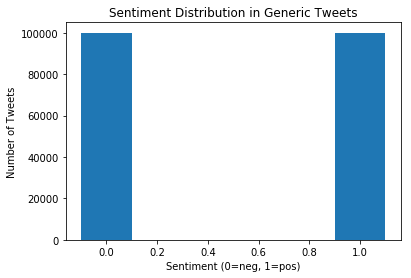

In [8]:
# Plot count of tweets for each sentiment
x = list(generic_tweets['class'].unique())
y = [len(generic_tweets[generic_tweets['class']==0]),
len(generic_tweets[generic_tweets['class']==1])]

fig = plt.bar(x,y,width=0.2, align='center')
plt.xlabel('Sentiment (0=neg, 1=pos)')
plt.title('Sentiment Distribution in Generic Tweets')
plt.ylabel('Number of Tweets')
plt.show()

The plot shows the generic tweets data set is evenly distributed between positive and negative sentiment. To monitor data cleaning, we will monitor the lengths before and after cleaning. 

In [9]:
# Create a column indicating the length of each tweet before cleaning
generic_tweets['Pre Clean Length'] = [len(txt) for txt in generic_tweets.text]

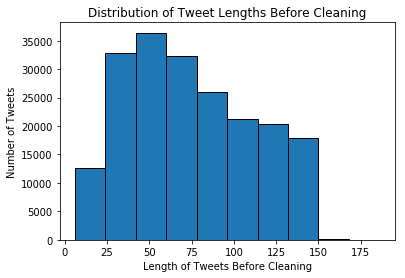

In [10]:
# Print histogram indicating pre clean lengths

plt.hist(generic_tweets['Pre Clean Length'], edgecolor='black')
plt.xlabel('Length of Tweets Before Cleaning')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweet Lengths Before Cleaning')
plt.show()

Based on the histogram, the lengths of the tweets seem to be greater than the actual limitation on Twitter, which is 140 characters. This increased length can be attributed to HTML characters embedded in the tweet text. 

In [11]:
# print sample tweets that are longer than 140 characters
generic_tweets[generic_tweets['Pre Clean Length'] > 140].head(n=5)

,class,id,date,query,user,text,Pre Clean Length
213,0,1467863684,Mon Apr 06 22:33:35 PDT 2009,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that s...,142
279,0,1467881373,Mon Apr 06 22:38:18 PDT 2009,NO_QUERY,ForzaRagazza,Whinging. My client&amp;boss don't understand ...,145
343,0,1467898061,Mon Apr 06 22:42:49 PDT 2009,NO_QUERY,Kevin_Lately,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,1467913111,Mon Apr 06 22:46:57 PDT 2009,NO_QUERY,nssmom,#3 woke up and was having an accident - &quot;...,144
464,0,1467929915,Mon Apr 06 22:51:46 PDT 2009,NO_QUERY,zeegirl602,"My bathtub drain is fired: it haz 1 job 2 do, ...",146


Prior to the cleaning process, the mentions and hashtags of the text may contain valuable information. Hence, we will extract these and add both as a new column on the dataframe. 

In [12]:
# Define function that will extract all mentions and hashtags
def extractMentions(text):
    text = text.lower()
    mentions = re.findall(r"@([a-zA-Z0-9]{1,15})", text)
    return mentions

def extractHashtags(text):
    text = text.lower()
    hashtags = re.findall(r"#(\w+)", text)
    return hashtags

In [13]:
# Extract all hashtags and mentions in the generic tweets
extracted_mentions_generic = []
extracted_hashtags_generic = []
for tweet in generic_tweets['text']:
    extracted_mentions_generic.append(extractMentions(tweet))
    extracted_hashtags_generic.append(extractHashtags(tweet))
generic_tweets['Mentions'] = extracted_mentions_generic
generic_tweets['Hashtags'] = extracted_hashtags_generic

In [14]:
generic_tweets.head(5)

,class,id,date,query,user,text,Pre Clean Length,Mentions,Hashtags
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,[switchfoot],[]
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,[],[]
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,[kenichan],[]
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,[],[]
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,[nationwideclass],[]


For the data cleaning process, we will methodologically show the process to address each of the requirements previously mentioned. Below is a sample of the cleaning function applied to one particular tweet (which can be easily changed for different test cases). This process is then generalized for the dataset. 

To assist with data cleaning, here are a few test cases to check (used in the development of the code):

Test Cases:
- HTML characters: generic_tweets.text[492]
- Mention words: generic_tweets.text[343]
- Hashtag: generic_tweets.text[175]
- Negative contraction words: generic_tweets.text[3313]
- Stop words: generic_tweets.text[3370]

In [15]:
# Print a sample tweet to be cleaned
raw_sample_tweet = generic_tweets.text[3313]
raw_sample_tweet

"Amber i don't know how often you check this, but i really miss you right now. Like, really really. So friggen much  i want a hug &lt;/Beth&gt;"

BeautifulSoup is normally used for webscraping text. As a result, we can use it to remove HTML characters as well from the raw tweets. Alternatively, we could have also used a replace function for each of the HTML characters present in the tweet. BeautifulSoup is most likely optimize to perform this task. Hence, this method was selected. 

In [16]:
# Use BeautifulSoup to remove HTML characters
sample_tweet_after_soup = BeautifulSoup(raw_sample_tweet, 'lxml')
sample_tweet_after_soup = sample_tweet_after_soup.get_text()
sample_tweet_after_soup

"Amber i don't know how often you check this, but i really miss you right now. Like, really really. So friggen much  i want a hug </Beth>"

In [17]:
# Convert tweet to lower case
lower_case_tweet = sample_tweet_after_soup.lower()
lower_case_tweet

"amber i don't know how often you check this, but i really miss you right now. like, really really. so friggen much  i want a hug </beth>"

In [18]:
# For sentiment analysis, we need to accomodate for informalities in the English language, particularly with contractions.
# We can exclude words such as that's, what's, etc. since they do not add any meaning for sentiment analysis
# We will primarily look into negative contractions by creating a dictionary that contains common negative contractions 
# based on: https://www.thoughtco.com/what-is-a-negative-contraction-1691339 

"""
aren't, isn't, wasn't, weren't
can't, couldn't, mustn't, shouldn't, won't, wouldn't
didn't, doesn't, don't
hasn't, haven't, hadn't

"""

neg_contraction_dictionary = {
    "aren't": "are not",
    "isn't": "is not", 
    "wasn't": "was not", 
    "weren't": "were not",
    "can't": "can not", 
    "couldn't": "could not",
    "mustn't": "must not",
    "shouldn't": "should not",
    "won't": "will not",
    "wouldn't": "would not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hasn't": "has not",
    "haven't": "have not",
    "hadn't": "had not"
}

# create an empty list to append words that are not negative contractions
replace_words = []

# iterate through the splitted string list and check if the word is in the dictionary of contractions
for word in lower_case_tweet.split():
    if word in neg_contraction_dictionary:
        # if word is in the dictionary, then append the expanded form
        replace_words.append(neg_contraction_dictionary[word])
    else:
        # if not in the dictionary, then its not a contraction. Append into the list
        replace_words.append(word)
        
# Combine all words again into a string separated by a space
expanded_string = " ".join(replace_words)
expanded_string

'amber i do not know how often you check this, but i really miss you right now. like, really really. so friggen much i want a hug </beth>'

Mentions were chosen to be removed since they might bias the data. For example, if everyone kept tweeting Donald Trump with negative sentiment, then those two words will skew the model to bias Donald Trump to hold negative sentiment. 

In [19]:
# Remove mentions and URLS.

# Create string patterns to capture words that start with @, http, www.
pattern_Mentions = r'@[A-Za-z0-9_]+'
pattern_URL = r'https?://[^ ]+'
pattern_www = r'www.[^ ]+'

# if the tweets have these patters, remove them 
combined_pattern = r'|'.join((pattern_Mentions, pattern_URL, pattern_www))
stripped_tweet = re.sub(combined_pattern, '', expanded_string)
stripped_tweet

'amber i do not know how often you check this, but i really miss you right now. like, really really. so friggen much i want a hug </beth>'

In [20]:
# Remove letters or hashtags since they don't add any value to the tweet
pattern_letters_only = r'[^a-zA-Z]'
clean_tweet_text = re.sub(pattern_letters_only, " ", stripped_tweet)
clean_tweet_text

'amber i do not know how often you check this  but i really miss you right now  like  really really  so friggen much i want a hug   beth '

To remove stop words, the nltk library's stop words were used. After inspecting the list of stop words, I decided to drop the word "not" from the list of stop words as removing this word may change the overall sentiment of the tweet, especially since I opted to expand negative contractions. 

In [21]:
# nltk stop word remove "not" from list
stop_words_nltk = set(stopwords.words('english'))
stop_words_nltk.remove('not')
# stop_words_nltk

In [22]:
# Find and remove stop words from the tweet

# create an empty array for the cleaned tweet
clean_words = []
for word in tokenizer.tokenize(clean_tweet_text):
    # split the words in the string and check if it is the stop word's list. If not, then append it back to the cleaned tweet list
    if len(word) > 1 and word not in stop_words_nltk:
        clean_words.append(word)

# combine the tweets back together
clean_tweet = " ".join(clean_words)
clean_tweet

'amber not know often check really miss right like really really friggen much want hug beth'

We will now construct a function that will repeat this process for all the tweets. 

In [23]:
# Now that the sample tweet was cleaned, we will create a function to quickly apply this to all of the tweets in the csv

def cleanTweet(text):
    # get rid of html characters
    tweet_after_soup = BeautifulSoup(text, 'lxml')
    tweet_after_soup = tweet_after_soup.get_text()

    # convert tweet characters to lower case
    lower_case_tweet = tweet_after_soup.lower()
    
    # expand concatenation
    replace_words = []
    for word in lower_case_tweet.split():
        if word in neg_contraction_dictionary:
            replace_words.append(neg_contraction_dictionary[word])
        else:
            replace_words.append(word)

    expanded_string = " ".join(replace_words)
    
    # remove @ and urls
    pattern_Mentions = r'@[A-Za-z0-9_]+'
    pattern_URL = r'https?://[^ ]+'
    pattern_www = r'www.[^ ]+'
    combined_pattern = r'|'.join((pattern_Mentions, pattern_URL, pattern_www))
    stripped_tweet = re.sub(combined_pattern, '', expanded_string)
    
    # remove # and numbers
    pattern_letters_only = r'[^a-zA-Z]'
    clean_tweet_text = re.sub(pattern_letters_only, " ", stripped_tweet)
    
    # remove stop words
    clean_words = []
    for word in tokenizer.tokenize(clean_tweet_text):
        if len(word) > 1 and word not in stop_words_nltk:
            clean_words.append(word)

    clean_tweet = " ".join(clean_words)

    return clean_tweet

In [24]:
# apply this to all the tweets in the generic data

cleaned_tweets = []
for tweet in generic_tweets['text']:
    cleaned_tweets.append(cleanTweet(tweet))

In [25]:
# Create a new column containing the cleaned tweets and add it to the dataframe
generic_tweets['Cleaned Text'] = cleaned_tweets
generic_tweets['Post Clean Length'] = [len(txt) for txt in generic_tweets['Cleaned Text']]
generic_tweets.head(n=5)

,class,id,date,query,user,text,Pre Clean Length,Mentions,Hashtags,Cleaned Text,Post Clean Length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,[switchfoot],[],awww bummer shoulda got david carr third day,44
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,[],[],upset not update facebook texting might cry re...,73
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,[kenichan],[],dived many times ball managed save rest go bounds,49
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,[],[],whole body feels itchy like fire,32
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,[nationwideclass],[],not behaving mad not see,24


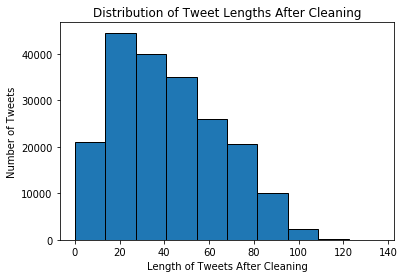

In [26]:
# Print histogram indicating post clean lengths

plt.hist(generic_tweets['Post Clean Length'], edgecolor='black')
plt.xlabel('Length of Tweets After Cleaning')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweet Lengths After Cleaning')
plt.show()

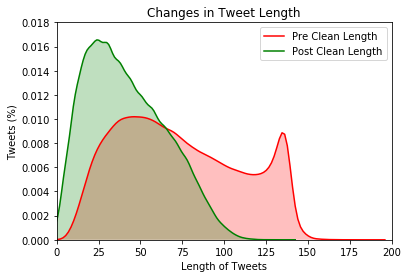

In [27]:
# Plot length distribution of before and after cleaning datasets
fig_1 = plt.figure(figsize=(6,4))
fig_1 = sns.kdeplot(generic_tweets['Pre Clean Length'], shade=True, color="red")
fig_1 = sns.kdeplot(generic_tweets['Post Clean Length'], shade=True, color="green")
plt.axis([0, 200, 0, 0.018])
plt.xlabel('Length of Tweets')
plt.ylabel('Tweets (%)')
plt.title('Changes in Tweet Length')
plt.show()

We can see that the lengths of the tweets have been reduced and are within the limitation of Twitter's character requirement. 

In [28]:
# Determine if there are any empty tweets. If there are, leave them there as per the assignment instructions
# count number of tweets empty
empty_count = 0
index = -1
for cleaned_tweet in generic_tweets["Cleaned Text"]:
    index = index + 1
    if not(cleaned_tweet):
        #print(index)
        empty_count = empty_count + 1

In [29]:
# Indicate how many tweets are empty after cleaning
empty_count

919

A sample of a tweet before cleaning that was empty after cleaning is shown below: 

In [30]:
generic_tweets['text'][195804] 

'http://twitpic.com/4j0mw - only because i can.. '

Based on the contents of the tweet, it was removed since the URL was removed and the remaining words were all stop words.

## 1.2 Data Cleaning US Airline Tweets

A similar approach as section 1.1 is done for the US airline tweets dataset. 

In [31]:
# Load US airline tweets
US_airlines_tweets = pd.read_csv('US_airline_tweets.csv')
US_airlines_tweets.head(n=5)

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


In [32]:
# Print number of tweets available in the data provided
len(US_airlines_tweets)

11541

In [33]:
# Change sentiment to be either 0 (negative) or 1 (positive) for the US tweets
US_airlines_tweets.loc[US_airlines_tweets['sentiment']=='positive', 'sentiment'] = 1
US_airlines_tweets.loc[US_airlines_tweets['sentiment']=='negative', 'sentiment'] = 0

In [34]:
# Determine how many are positive and negative sentiment in the generic tweets set
US_airlines_tweets['sentiment'].value_counts()

0    9178
1    2363
Name: sentiment, dtype: int64

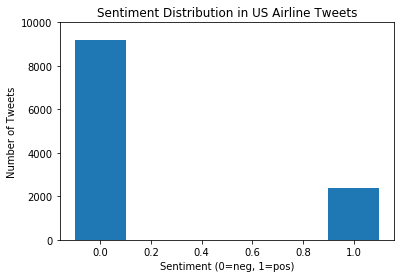

In [35]:
# Plot count of tweets for each sentiment
x = [0, 1]
y = [len(US_airlines_tweets[US_airlines_tweets['sentiment']==0]),
len(US_airlines_tweets[US_airlines_tweets['sentiment']==1])]

plt.bar(x,y,width=0.2, align='center')
plt.xlabel('Sentiment (0=neg, 1=pos)')
plt.title('Sentiment Distribution in US Airline Tweets')
plt.ylabel('Number of Tweets')
plt.ylim(0, 10000)
plt.show()

Based on the above graph, there are more negative sentiment tweets than the positive tweets. 

We will extract the mentions and hashtags for the US airlines as they will contain useful information in the following segment of the assignment. 

In [36]:
# Extract all hashtags and mentions in the data
extracted_mentions_airlines = []
extracted_hashtags_airlines = []
for tweet in US_airlines_tweets['text']:
    extracted_mentions_airlines.append(extractMentions(tweet))
    extracted_hashtags_airlines.append(extractHashtags(tweet))
US_airlines_tweets['Mentions'] = extracted_mentions_airlines
US_airlines_tweets['Hashtags'] = extracted_hashtags_airlines

In [37]:
# Clean the US airlines tweets
cleaned_airline_tweets = []
for tweet in US_airlines_tweets['text']:
    cleaned_airline_tweets.append(cleanTweet(tweet))
    
US_airlines_tweets['Cleaned Text'] = pd.Series(cleaned_airline_tweets)

--------------------------------------------------------------------------------------------------------------------------------
# 2. Exploratory Analysis

In the first subsection, we develop a procedure that determines the associated airline of a tweet by using the mention/hashtags/user of the tweet. 

The second section presents multiple graphical figures to depict some visual aspect of the generic tweets and another set of figures for the US airlines. 

## 2.1 Find Airline of a given tweet and find distribution of airline tweets

The following procedure was performed to determine which tweet is associated to which airline: 
- Look at mentions. To create a list of US airlines available, we can see how often the airlines were mentioned in the entire data and create a list containing these frequent US airlines. 
- Look at hashtags. Some people may not have used a mention but wrote a hashtag containing the airlines name. There is a chance that hashtags may not be useful compared to mentions or users. 
- Look at user. Perhaps the airlines might have tweeted out to a customer.

In [38]:
# flatten mentions to count how many times each airlines was mentioned
# the common airlines found will be used to construct a list to determine which airline is associated with each tweet
flat_mentions = []
for sublist in US_airlines_tweets['Mentions']:
    for item in sublist:
        flat_mentions.append(item)

counts_mentions = Counter(flat_mentions).most_common(20)
print(counts_mentions)

[('united', 3192), ('usairways', 2607), ('americanair', 2462), ('southwestair', 1788), ('jetblue', 1519), ('virginamerica', 344), ('delta', 60), ('imaginedragons', 17), ('phlairport', 17), ('dfwairport', 12), ('fortunemagazine', 10), ('love', 8), ('spiritairlines', 8), ('cowboycerrone', 7), ('dulles', 6), ('aircanada', 6), ('staralliance', 6), ('cnn', 6), ('gg8929', 6), ('wsj', 6)]


In [39]:
# We now look at the hashtags
flat_hashtags = []
for sublist in US_airlines_tweets['Hashtags']:
    for item in sublist:
        flat_hashtags.append(item)

counts_hashtags = Counter(flat_hashtags).most_common(20)
print(counts_hashtags)

[('fail', 69), ('jetblue', 46), ('unitedairlines', 41), ('customerservice', 36), ('destinationdragons', 31), ('usairways', 29), ('neveragain', 27), ('united', 26), ('americanairlines', 25), ('usairwaysfail', 25), ('disappointed', 24), ('badservice', 21), ('frustrated', 18), ('badcustomerservice', 18), ('help', 17), ('nothappy', 14), ('travel', 13), ('epicfail', 11), ('unacceptable', 10), ('unfriendlyskies', 10)]


From the mentions, we saw: united, usairways, americanair, southwestair, jetblue, virginamerica, delta, spiritedairlines

From the hashtags, we saw similar airlines: jetblue, unitedairlines, usairways, etc. 

Since mentions contain more information, we will use the information in mentions to generate the list of airlines. It is important to note that some tweets contain more than one associated airline. For example, one can complain about a particular airline and then compare them to a better airline. For these cases, one tweet can be a negative tweet for one airline and positive for the other. To make associating each tweet simpler, the first airline mentioned in the tweet will be used. This is a suitable assumption as most people mention the subject of the tweet in the beginning of the tweet. 

Using this results, we can create a new column in the dataframe to categorize each tweet to an airline by constructing a list of airlines and checking if the entity mentioned is in the list of airlines and its frequency in the tweet. 

In [40]:
US_airlines_list = ['united', 'usairways', 'americanair', 'southwestair', 'jetblue', 'virginamerica', 'delta', 'spiritedairlines', 'unitedairlines', 'deltaassist']

In [41]:
# check if mention is in list
# if mention is not in list, look at hashtag
airlines = []
counter = 1
index = 0 
indices = [] # used to determine if there are any empty tweets
for contents_mentions in US_airlines_tweets['Mentions']:
    for mentions in contents_mentions:
        if mentions in US_airlines_list and counter <= len(contents_mentions):
            airlines.append(mentions)
            counter = 1
            break
        elif mentions not in US_airlines_list and counter == len(contents_mentions):
            airlines.append("")
            indices.append(index)
            break
        else:
            counter = counter + 1
    index = index+1
US_airlines_tweets['Airline'] = airlines

In [42]:
# print if there were any tweets that were not assigned
print(indices)

[6184]


In [43]:
# This particular tweet did not have a mention to an airline but rather the airline was the one who tweeted. 
# Thus, assign the airlines to the airline who tweeted
US_airlines_tweets.iloc[6184]

id                                                       5.68602e+17
sentiment                                                          1
negative_reason                                                  NaN
user                                                         JetBlue
retweet_count                                                      3
text               @NinaDavuluri We think it's a treat to have yo...
Mentions                                              [ninadavuluri]
Hashtags                                                          []
Cleaned Text                        think treat onboard enjoy flight
Airline                                                             
Name: 6184, dtype: object

In [44]:
# We will do this by setting airlines at this index to be the user and then drop and re-add the airlines column in the dataframe
for index in indices:
    airlines[index] = str(US_airlines_tweets.iloc[index]['user']).lower()

# We print all the unique entities in this list
airlines_complete = pd.Series(airlines)
airlines_complete.unique()

array(['virginamerica', 'united', 'southwestair', 'jetblue', 'usairways',
       'americanair', 'deltaassist'], dtype=object)

In [45]:
# We see the delta assist should be converted to delta to represent the actual name of the airlines
airline_list_complete = []
for airline in airlines:
    if airline == "deltaassist":
        airline_list_complete.append("delta")
    else:
        airline_list_complete.append(airline)

airline_series = pd.Series(airline_list_complete)
airline_series.unique()
#airlines_complete_revised = pd.Series(airlines)
#airlines_complete_revised.unique()

array(['virginamerica', 'united', 'southwestair', 'jetblue', 'usairways',
       'americanair', 'delta'], dtype=object)

In [46]:
# Drop old airlines column in the dataframe and add the revised and complete airline list
US_airlines_tweets.drop(columns = ['Airline'])
US_airlines_tweets['Airline'] = airline_series
US_airlines_tweets.head(n=5)

,id,sentiment,negative_reason,user,retweet_count,text,Mentions,Hashtags,Cleaned Text,Airline
0,5.703010e+17,1,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,[virginamerica],[],plus added commercials experience tacky,virginamerica
1,5.703010e+17,0,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,[virginamerica],[],really aggressive blast obnoxious entertainmen...,virginamerica
2,5.703010e+17,0,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,[virginamerica],[],really big bad thing,virginamerica
3,5.703010e+17,0,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,[virginamerica],[],seriously would pay flight seats not playing r...,virginamerica
4,5.703010e+17,1,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",[virginamerica],[],yes nearly every time fly vx ear worm go away,virginamerica


In [47]:
# Distribution of US airline tweets
# We will look into which airlines was the most popular on Twitter (i.e. count number of tweets and find the frequency on who got mentioned the most)

airline_list_complete_counts = Counter(airline_list_complete)
# print(airline_list_complete_counts)

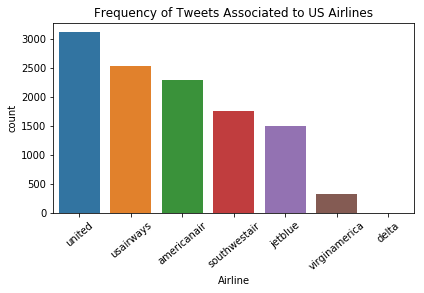

In [48]:
airline_list = list(airline_list_complete_counts.keys())
airline_count = list(airline_list_complete_counts.values())
#sns.countplot(airline_list_complete_counts.values())
ax=sns.countplot(x=US_airlines_tweets['Airline'], order = US_airlines_tweets['Airline'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.tight_layout()
plt.title('Frequency of Tweets Associated to US Airlines')
plt.show()

In [49]:
# lets count the number of negative tweets associated with each airline
US_airlines_tweets.groupby(['Airline', 'sentiment']).count()

id  negative_reason  user  retweet_count  text  \
Airline       sentiment                                                     
americanair   0          1960             1960  1960           1960  1960   
              1           336                0   336            336   336   
delta         0             2                2     2              2     2   
jetblue       0           953              953   953            953   953   
              1           544                0   544            544   544   
southwestair  0          1187             1187  1187           1187  1187   
              1           570                0   570            570   570   
united        0          2632             2632  2632           2632  2632   
              1           492                0   492            492   492   
usairways     0          2263             2263  2263           2263  2263   
              1           269                0   269            269   269   
virginamerica 0           181              181   181            181   181   
              1           152                0   152            152   152   

                         Mentions  Hashtags  Cleaned Text  
Airline       sentiment                                    
americanair   0              1960      1960          1960  
              1               336       336           336  
delta         0                 2         2             2  
jetblue       0               953       953           953  
              1               544       544           544  
southwestair  0              1187      1187          1187  
              1               570       570           570  
united        0              2632      2632          2632  
              1               492       492           492  
usairways     0              2263      2263          2263  
              1               269       269           269  
virginamerica 0               181       181           181  
              1               152       152           152

In [50]:
# Count the number of positive tweets associated with each airline

# US_airlines_tweets.groupby(['Airline', 'sentiment']).count().index[1][1]
df_act = US_airlines_tweets.groupby(['Airline', 'sentiment']).count()
negative_list_airline = []
negative_list_count = []
positive_list_airline = []
positive_list_count = []
for index, row in df_act.iterrows():
    # index[0] is the airline
    # index[1] is the sentiment category
    # row.id is the count
    if index[1] == 0:
        negative_list_airline.append(index[0])
        negative_list_count.append(row.id)
    else:
        positive_list_airline.append(index[0])
        positive_list_count.append(row.id)

# Since delta doesn't have any positive tweet, we will manually add it to the column to make 
# it easier to plot a comparison between negative and positive tweets
positive_list_airline.insert(1,'delta')
positive_list_count.insert(1, 0)

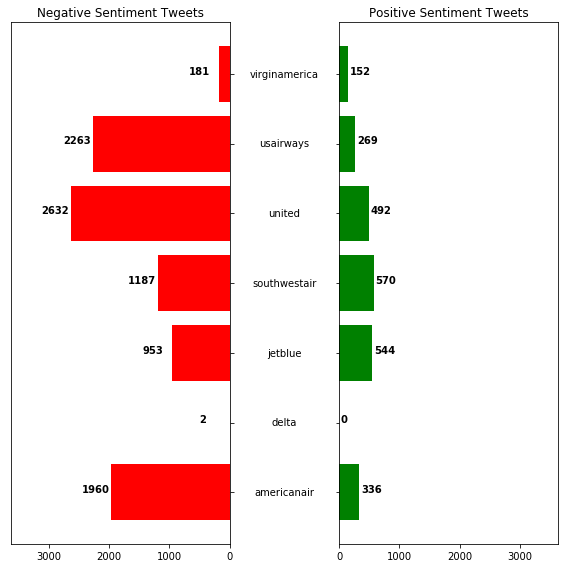

In [51]:
# we see that there are more negative tweets associated with each airlines than positive tweets
# we can illustrate this in the form of a bar graph
y = range(len(negative_list_airline))
x1 = negative_list_count
x2 = positive_list_count

#f, axs = plt.subplots(2,2,figsize=(15,15))

fig_compare, axes = plt.subplots(ncols=2, sharey=True, figsize=(8,8))
axes[0].barh(y, x1, align='center', color='red')
axes[0].set(title='Negative Sentiment Tweets')
axes[1].barh(y, x2, align='center', color='green')
axes[1].set(title='Positive Sentiment Tweets')
axes[0].set_xlim([0,max(x1)+1000])
axes[1].set_xlim([0,max(x1)+1000])
axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=negative_list_airline)
axes[0].yaxis.tick_right()

axes[0].set(yticks=y, yticklabels=[])
for yloc, airline in zip(y, negative_list_airline):
    axes[0].annotate(airline, (0.5, yloc), xycoords=('figure fraction', 'data'),
                     ha='center', va='center')
for i, v in enumerate(x1):
    axes[0].text(v+500, i, str(v),fontweight='bold')

for i, v in enumerate(x2):
    axes[1].text(v+30, i, str(v),fontweight='bold')
    
fig_compare.tight_layout()
fig_compare.subplots_adjust(wspace=0.5)

plt.show()

#### What can you say about the distribution of the US airlines of the tweets?

Based on the bar graph, the airlines that were tweeted about the most in descending order are: 
1. United
2. US Airways
3. American Air
4. Southwest Air
5. Jetblue
6. Virgin America
7. Delta

Hence, United and US Airways were the subject of most tweets. Comparing the negative and positive tweets, there were more negative tweets associated with the US Airlines in 2015. Among all airlines, United and US Airways received the bulk of negative tweets in the provided dataset. Nevertheless, there were also some people who tweeted positive things about these airlines, but these are a very small number. It should be noted that some tweets may have been attributed to multiple airlines. For example, a tweet comparing United to Virgin America may be negative for United but positive for the latter airline. Despite this possibility, it is assumed that the subject of the tweet would be mentioned in the beginning of the tweet as indicated in the raw data set. 

## 2.2 Present some aspects of the generic tweets and some figures for the US airline tweets

This section will focus on visualizing some aspect of the generic and US airlines tweets. The figures presented are the word clouds representing common words in both the generic and US airline tweets. As the assignment requires only two graphs, additional graphs were presented as part of the bonus marks available in the assignment and are labelled accordingly in the section headers. Specifically, we present a graph of the word cloud for both positive and negative tweets for both the generic and US airline tweets. Additionally, a graphed stack bar graph showing the distribution of negative reasons among the US airlines are also shown. 

Summary of graphs presented: 
- Word cloud of positive tweets after cleaning for generic tweets (one figure)
- BONUS: Word cloud of negative tweets after cleaning for generic tweets (one figure)

- Word cloud of positive tweets after cleaning for US airline tweets (one figure)
- BONUS: Word cloud of negative tweets after cleaning for US airline tweets (one figure)

- BONUS: Stacked bar graph showing distribution of negative reasons among different airlines (one figure)

To make a clear visual representation of the positive and negative emotions in the words of a tweet, each tweet dataset were split based on their sentiment and then the frequency of the most occuring words were presented in the form of word clouds. 

### 2.2.1 Graph word cloud of words in positive tweets after cleaning for generic tweets

In [52]:
def getWordCloud(text, maxWords, maxFontSize, colorMap):
    tweet_words = []
    for sublist in text:
        for words in tokenizer.tokenize(sublist):
            tweet_words.append(words)
    combine_tweet_words = " ".join(tweet_words)
    wordcloud_tweets = WordCloud(max_words = maxWords, max_font_size = maxFontSize, background_color="white", colormap = colorMap).generate(combine_tweet_words)
    return wordcloud_tweets

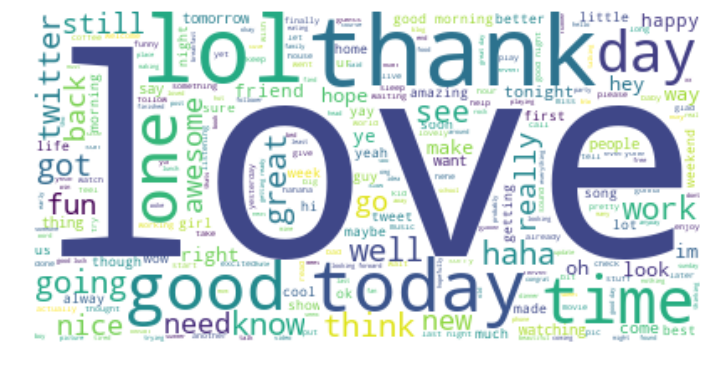

In [53]:
# Positive words from generic tweets
# sort through which generic tweets are positive
pos_generic_tweets = generic_tweets[generic_tweets['class']==1]
pos_generic_text = pos_generic_tweets['Cleaned Text']
wordcloud_pos_generic_tweets = getWordCloud(pos_generic_text, 300, 500,'viridis')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_pos_generic_tweets, interpolation="bilinear")
plt.axis("off")
plt.show()

Words that often show in the positive sentiment tweets of the generic tweets indicate feelings of fun, happiness, love, gratefulness, etc.  

### BONUS: 2.2.2 Graph word cloud of words in negative tweets after cleaning for generic tweets

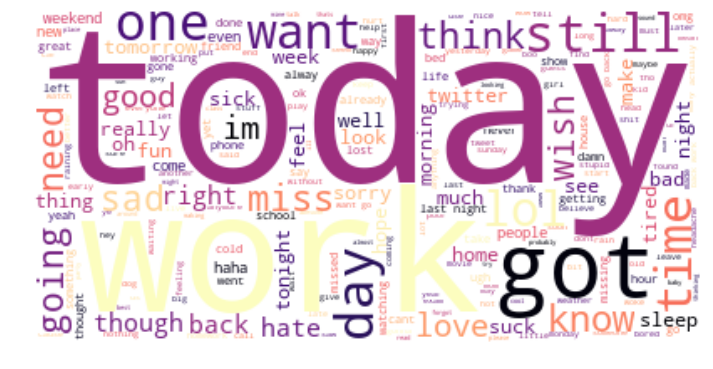

In [54]:
# negative words from generic tweets
# sort through which generic tweets are negative
neg_generic_tweets = generic_tweets[generic_tweets['class']==0]
neg_generic_text = neg_generic_tweets['Cleaned Text']
wordcloud_neg_generic_tweets = getWordCloud(neg_generic_text, 300, 500, 'magma')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_neg_generic_tweets, interpolation="bilinear")
plt.axis("off")
plt.show()

Words that often show up in negative sentiment tweets of the generic tweets show feelings of sadness, missing someone, being tired, or tweets talking about work. 

### 2.2.3 Graph word cloud of words in positive tweets after cleaning for US airline tweets

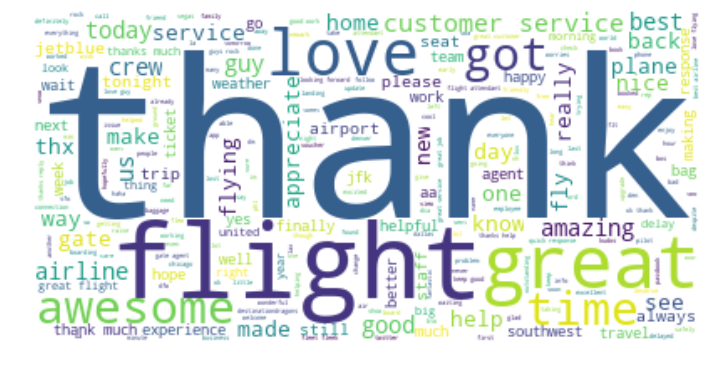

In [55]:
# Positive words from US airlines tweets
# sort through which US airlines tweets are positive
pos_airline_tweets = US_airlines_tweets[US_airlines_tweets['sentiment']==1]
pos_airline_tweets_text = pos_airline_tweets['Cleaned Text']
wordcloud_pos_airline_tweets = getWordCloud(pos_airline_tweets_text, 300, 500,'viridis')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_pos_airline_tweets, interpolation="bilinear")
plt.axis("off")
plt.show()

Words that show up in the positive tweets in the US airline data set contain feelings of thankfulness most likely due to great customer service. 

### BONUS: 2.2.4 Graph word cloud of words in negative tweets after cleaning for US airline tweets

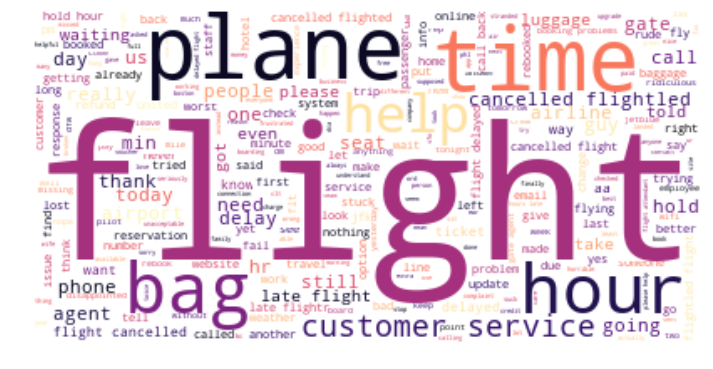

In [56]:
# Negative words from US airlines tweets
# sort through which US airlines tweets are negative
neg_airline_tweets = US_airlines_tweets[US_airlines_tweets['sentiment']==0]
neg_airline_tweets_text = neg_airline_tweets['Cleaned Text']
wordcloud_neg_airline_tweets = getWordCloud(neg_airline_tweets_text, 300, 500,'magma')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_neg_airline_tweets, interpolation="bilinear")
plt.axis("off")
plt.show()

Words that show up in the negative sentiment tweets in the US airline data contain mostly the words relating to customer service, flights (probably caused by delayed or late flights). It is interesting to see the word "thank" in the word cloud since it must have been used in a sarcastic tone in the tweet. 

### BONUS: 2.2.5 Graph stacked bar graph showing distribution of negative reasons among different airlines

In [57]:
# Determine most frequent negative reason for negative tweets and the associated airline for each negative reason
# group negative airlines based on the negative reason and from the airline
stacked_bargraph = neg_airline_tweets.groupby(['negative_reason', 'Airline']).size()

In [58]:
# group them based on the sum of the negative reason frequencies
stacked_bargraph_sort = stacked_bargraph.groupby(level=[0]).sum().sort_values(ascending=False)
stacked_bargraph_sort.index

Index(['Customer Service Issue', 'Late Flight', 'Can't Tell',
       'Cancelled Flight', 'Lost Luggage', 'Bad Flight',
       'Flight Booking Problems', 'Flight Attendant Complaints', 'longlines',
       'Damaged Luggage'],
      dtype='object', name='negative_reason')

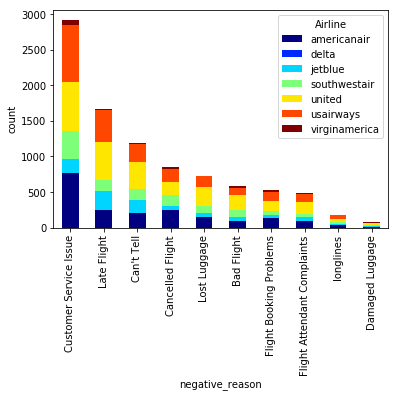

In [59]:
# Use jet color map
cmp = plt.cm.get_cmap('jet')
# reindex the previously groupedby dataframe based on the sum of the negative reasons and plot it
stacked_bargraph.reindex(index=stacked_bargraph_sort.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.ylabel('count')
plt.show()

Based on the stacked bar graph, most of the negative reasons associated with the negative sentiment tweets in the US airline are dealing with customer service related issues. United, American Air, and US Airways typicallly have the most complaints among the variety of negative reasons. Most of which are due to poor customer service. 

********************************************************************************************************************************
## 3. Model Preparation on Generic Tweets Data Set and US Airlines Data Set

The features of each tweet in the generic tweets (after cleaning) were identified. For this assignment, the frequency of each word associated in the tweets were converted into a matrix using the CountVectorizer class from the scikit-learn package. The resulting frequency of each tweet is a row containing the frequency of the occurence of the most common words in the corpus of the generic tweets. Additionally, the bag of words representation were also used in the form of the n-gram setting in the CountVectorizer function. It was noted that selecting a higher n-gram parameter resulted in a slightly higher accuracy but increased the computational cost of the model. Hence, for this assignment, an n-gram ranging from one word to three words was used. The results and metric evaluations are discussed in Section 4.0. 

The subsections below show the necessary steps to generate the features used for creating the model in section 4.0. 

### 3.1 Model Preparation on Generic Tweets Data Set

In this subsection, we crate a corpus containing words from the generic tweets. We then use CountVectorizer() to find the most common words and use them as features for each tweet. The outcome of the fit and transform of the CountVectorizer will result in a list for each tweet where each column represents a word from the most frequent corpus generated beforehand. 

While other parameters could have been used such as the TFIDVectorizer which is similar to the CountVectorizer but with a normalization within the specific sentence, this would require a larger computational time and would yield very similar results.   

In [60]:
# Create a corpus of all the words in the generic tweet
corpus_generic = list(generic_tweets['Cleaned Text'])

# Select feature creation tool
cv = CountVectorizer()

# Parameters for the features
cv.set_params(ngram_range = (1,3))

# Create the features based on the frequency of the words for the generic tweets dataset
X_generic = cv.fit_transform(corpus_generic)
# print(len(cv.vocabulary_))
# print(cv.vocabulary_)

In [61]:
# Use sentiment for the output 
y_generic = generic_tweets['class'].values

### 3.2 Model Preparation on US Airlines Data Set

A similar method as in 3.1 was performed for the tweets in the US airline data set. 

In [62]:
# Create corpus list of US airline tweets
corpus_US_airline = list(US_airlines_tweets['Cleaned Text'])

# Transform the tweet to the features we used in our previous model
X_US_airline = cv.transform(corpus_US_airline)

# Use sentiment as the output
y_US_airline = US_airlines_tweets['sentiment']

********************************************************************************************************************************
## 4. Model Implementation

This section will first create a logistic regression model by training the model using the generic data set. The accuracy of this model to distinguish sentiment will be presented in 4.1 along with metric evaluation techniques. 

In subsection 4.2, the logistic regression model trained on the generic data set will be used to estimate the sentiment of the US airline tweets. 

Lastly, the negative US airline tweets will be split into 70% training and 30% testing data sets to predict the negative reasons behind these negative tweets. A multi-class logistic regression model will be used to perform this task. As there are multiple negative reasons, these reasons will be re-categorized/combined to form fewer categories to make the multi-classification problem easier. 

### 4.1 Create Logistic Regression Model Using Generic Tweets Data Set

Using the features generated from section 3.1, we will divide the model into 70% training and 30% testing sets. A logistic regression model will be created using the scikit learn library. 

In [63]:
# Split the generic tweets randomly into training (70%) and test data (30%)
X_generic_train, X_generic_test, y_generic_train, y_generic_test = train_test_split(X_generic,y_generic,test_size=0.3, random_state=125)

In [64]:
# Train the logistic regression model
start_time = time.time()
model = LogisticRegression()
model.fit(X_generic_train,y_generic_train)
print("Training took: %s seconds" % (time.time() - start_time))

Training took: 23.164430379867554 seconds


We will use prediction accuracy as a metric to determine the performance of the model. In binary classification, it is defined as:
$$accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$

In [65]:
# Use the test data to assess accuracy
predictions_generic = model.predict(X_generic_test)

In [66]:
print('Accuracy: %.2f%%' % (accuracy_score(y_generic_test, predictions_generic)*100))

Accuracy: 78.76%


In [67]:
# Print classification report
print(classification_report(y_generic_test,predictions_generic))

             precision    recall  f1-score   support

          0       0.80      0.77      0.78     30176
          1       0.78      0.81      0.79     29824

avg / total       0.79      0.79      0.79     60000



The classification report package was used to calculate precision, recall and the f1-score of the trained model. This evaluates the model in terms of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN). 

The following are the formal definitions for precision, recall and f1 score respectively. 

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$ 
$$F1-score = \frac{2}{\frac{1}{R1ecall} + \frac{1}{Precision}}$$

A 81% recall value was achieved for the positive sentiment, which indicates that the model was able to predict 81% as positive, and were indeed positive. In a similar manner, the precision value of 80% indicates that 80% of the truly negative tweets were identified. The F1 score combines these metrics into a single value like a weighted average. The average f1 score was found to be 0.79 which is acceptable in its application in sentiment analysis. 

In [68]:
# Plot non normalized confusion matrix
cnf_matrix_generic = confusion_matrix(y_generic_test, predictions_generic)
print (cnf_matrix_generic)
class_names = generic_tweets['class'].unique()
class_names_label = ['negative', 'positive']

[[23211  6965]
 [ 5780 24044]]


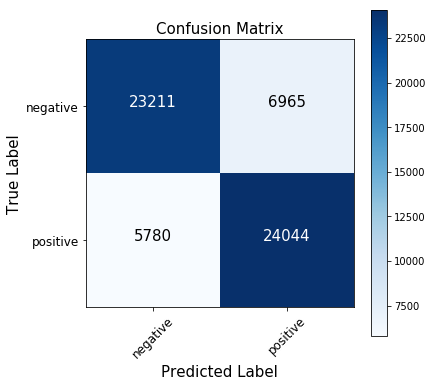

In [69]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(cnf_matrix_generic, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names_label, rotation=45, fontsize=12)
plt.yticks(tick_marks, class_names_label, fontsize=12)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)


for i in range(len(cnf_matrix_generic)):
    for j in range(len(cnf_matrix_generic[i])):
        color = 'black'   
        if cnf_matrix_generic[i][j] > 10000:
            color = 'white'
        plt.text(j, i, format(cnf_matrix_generic[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)


The confusion matrix was also computed and plotted using a heat map. Ideally, a good model is one whose diagonal components of the confusion matrix should be relatively high as these correspond to the model's accuracy of true positives and true negatives. The confusion matrix also complements the previously reported recall and precision values of the positive and negative tweets. 

Area under the ROC curve: 0.788008


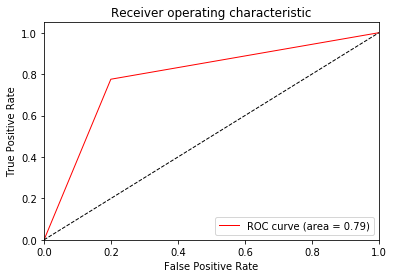

In [70]:
# ROC curve - plot True Positive Rate against False Positive Rate
fpr, tpr, thresholds = roc_curve(predictions_generic, y_generic_test)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f" % roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve is also plotted above. As seen, the curve passes through the upper left portion of the line segment, which indicates good performance for the sensitivity/specificity pair compared to the decision threshold. The area under the curve was calculated to be 0.79, which is still decent and far compared to the worst case of 0.5 (equivalent to random guessing). In general, based on the results of the classification report, confusion matrix, and the ROC curve, the models seems to perform well and can be used for the US airline tweets. 

### 4.2 Test Logistic Regression Model on US Airline Tweets

In this section, we will use the previously trained model to predict the positive or negative sentiment of the US airline tweets data set. 

In [71]:
# Use the previous model from Section 3 to predict the sentiment of the US airline tweets
predictions_US_airline = model.predict(X_US_airline)

In [72]:
print('Accuracy: %.2f%%' % (accuracy_score(y_US_airline, predictions_US_airline)*100))

Accuracy: 78.18%


In [73]:
# Print classification report
print(classification_report(y_US_airline,predictions_US_airline))

             precision    recall  f1-score   support

          0       0.96      0.75      0.85      9178
          1       0.48      0.89      0.63      2363

avg / total       0.87      0.78      0.80     11541



In a similar manner to the generic tweets, the classification report package was used to calculate precision, recall and the f1-scores for the model applied to the US airline tweets. This evaluates the previously developed model on a new set of tweets. Based on the report, it is shown that the model is able to achieve a recall value of 89% for the positive sentiment tweets, and a precision value of 96% of the negative tweets. This indicates quite a high accuracy in detecting negative tweets. However, the model also tends to incorrectly identify certain tweets particularly for the negative tweets since the model predicts a large number of tweets to be positive where in fact they should be negative (as shown in the recall value for the negative sentiment). This will be easily visualized through the use of a confusion matrix. 

In [74]:
# Plot non normalized confusion matrix
cnf_matrix_airline = confusion_matrix(y_US_airline, predictions_US_airline)
print (cnf_matrix_airline)
class_names_airline = US_airlines_tweets['sentiment'].unique()
class_names_label_airline = ['negative', 'positive']

[[6915 2263]
 [ 255 2108]]


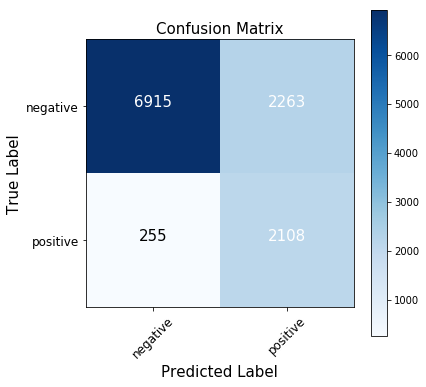

In [75]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(cnf_matrix_airline, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(class_names_airline))
plt.xticks(tick_marks, class_names_label_airline, rotation=45, fontsize=12)
plt.yticks(tick_marks, class_names_label_airline, fontsize=12)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)


for i in range(len(cnf_matrix_airline)):
    for j in range(len(cnf_matrix_airline[i])):
        color = 'black'   
        if cnf_matrix_airline[i][j] > 500:
            color = 'white'
        plt.text(j, i, format(cnf_matrix_airline[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)


Similar to previous results from the classification report, the model tends to incorrectly identify certain tweets as positive where in fact, they were negative. 

Area under the ROC curve: 0.723352


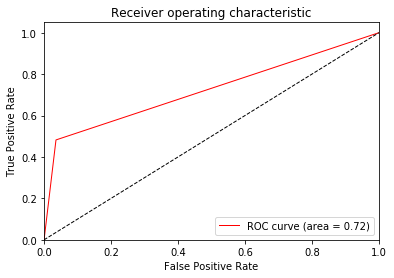

In [76]:
# ROC curve - plot True Positive Rate against False Positive Rate
fpr, tpr, thresholds = roc_curve(predictions_US_airline, y_US_airline)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f" % roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Based on the ROC curve, the curve also passes near the upper left portion of the line segment, which indicates better performance than random guessing. The area under the curve was calculated to be 0.72, which is less than the previous ROC curve for the generic tweets test case. This can be attributed to the tendency of the model to incorrectly predict the negative tweets as positive tweets. 

The figures below show the actual and predicted sentiment distribution of the US Airlines data set. 

In [77]:
# add the predicted sentiment on the dataframe
US_airlines_tweets['Predicted Sentiment'] = pd.Series(predictions_US_airline)

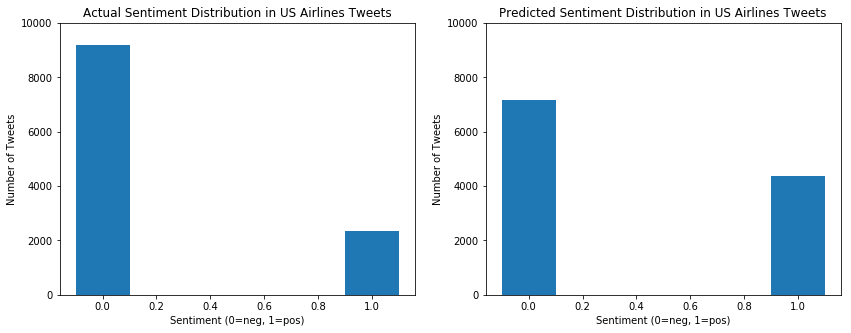

In [78]:
# Actual Sentiment of US Airline Tweets
x = [0, 1]
y_act = [len(US_airlines_tweets[US_airlines_tweets['sentiment']==0]),
len(US_airlines_tweets[US_airlines_tweets['sentiment']==1])]

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.bar(x,y_act, width=0.2, align='center')
plt.xlabel('Sentiment (0=neg, 1=pos)')
plt.title('Actual Sentiment Distribution in US Airlines Tweets')
plt.ylabel('Number of Tweets')
plt.ylim(0, 10000)
#plt.show()

# Predicted Sentiment of US Airline Tweets
y_pre = [len(US_airlines_tweets[US_airlines_tweets['Predicted Sentiment']==0]),
len(US_airlines_tweets[US_airlines_tweets['Predicted Sentiment']==1])]
plt.subplot(1,2,2)
plt.bar(x,y_pre, width=0.2, align='center')
plt.xlabel('Sentiment (0=neg, 1=pos)')
plt.title('Predicted Sentiment Distribution in US Airlines Tweets')
plt.ylabel('Number of Tweets')
plt.ylim(0, 10000)
plt.show()

#### How well do you predictions match the sentiment labelled in the US airline data? 

The model trained from the generic tweets data set achieved an accuracy of 78.18% in estimating the sentiment of the airline tweets. Looking into the classification report and confusion matrix, it can be seen that the model can estimate negative sentiment tweets better than the positive sentiment. The model was also noted to incorrectly estimate negative tweets as positive tweets. This may be attributed with the decision threshold between the two binary classes as seen on the curvature and area of the ROC curve (ideally, we would want this curve to be closer to the upper left corner and have an area of 1). This shape is attributed to challenging decision thresholds from the features of the tweets. Nevertheless, this model achieved a relatively high accuracy of 78.18% accuracy and is suitable for sentiment analysis. 

### 4.2.1. BONUS: Tuning Hyperparameters (C Parameter in Sentiment Analysis)

In this section, we will begin to tune the hyperparameters of the logistic regression model used to detect negative or positive sentiment of the US airline tweets. We will begin by changing the C parameter of the logistic regression model. The C parameter represents the inverse of the regularization strength. A larger regularization strength means that it is less likely for the model to overfit the data. As the C parameter is the inverse of this parameter, a small C would adjust the model to ensure that it doesn't overfit the data whereas a high C parameter would tend to overfit. 

In [79]:
# C parameter tuning applied to generic tweets
C_tuning = np.arange(0.1, 1.1, 0.1)
C_generic_accuracies = []
C_US_airlines_accuracies = []

for C_test in C_tuning:
    # train logistic regression model with different C parameters
    model_C_tuning = LogisticRegression(C=C_test)
    model_C_tuning.fit(X_generic_train, y_generic_train)
    
    # apply model on generic tweet test set and the US airline tweet dataset
    predictions_C_generic_test = model_C_tuning.predict(X_generic_test)
    predictions_C_US_airline = model_C_tuning.predict(X_US_airline)
    
    # store accuracies to be plotted later
    C_generic_accuracies.append(accuracy_score(y_generic_test, predictions_C_generic_test)*100)
    C_US_airlines_accuracies.append(accuracy_score(y_US_airline, predictions_C_US_airline)*100)
    
    print('C Parameter: %.1f, Generic Set Accuracy: %.2f%%, US Airline Set Accuracy: %.2f%%, ' % (C_test, (accuracy_score(y_generic_test, predictions_C_generic_test)*100), (accuracy_score(y_US_airline, predictions_C_US_airline)*100)))

C Parameter: 0.1, Generic Set Accuracy: 78.30%, US Airline Set Accuracy: 77.71%, 
C Parameter: 0.2, Generic Set Accuracy: 78.55%, US Airline Set Accuracy: 78.00%, 
C Parameter: 0.3, Generic Set Accuracy: 78.69%, US Airline Set Accuracy: 78.03%, 
C Parameter: 0.4, Generic Set Accuracy: 78.76%, US Airline Set Accuracy: 78.07%, 
C Parameter: 0.5, Generic Set Accuracy: 78.73%, US Airline Set Accuracy: 78.09%, 
C Parameter: 0.6, Generic Set Accuracy: 78.73%, US Airline Set Accuracy: 78.08%, 
C Parameter: 0.7, Generic Set Accuracy: 78.78%, US Airline Set Accuracy: 78.14%, 
C Parameter: 0.8, Generic Set Accuracy: 78.78%, US Airline Set Accuracy: 78.13%, 
C Parameter: 0.9, Generic Set Accuracy: 78.76%, US Airline Set Accuracy: 78.16%, 
C Parameter: 1.0, Generic Set Accuracy: 78.76%, US Airline Set Accuracy: 78.18%, 


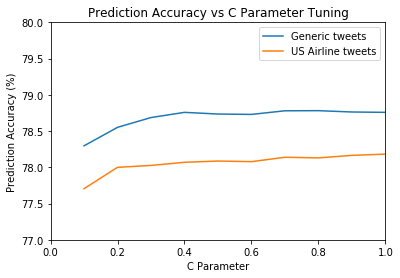

In [80]:
# Plot Accuracies vs C Parameter

plt.plot(C_tuning, C_generic_accuracies, C_tuning, C_US_airlines_accuracies)
plt.axis([0, 1, 77, 80])
plt.gca().legend(('Generic tweets','US Airline tweets'))
plt.title('Prediction Accuracy vs C Parameter Tuning')
plt.xlabel('C Parameter')
plt.ylabel('Prediction Accuracy (%)')
plt.show()

From the above graph, we can see that the C Parameter does in fact affect performance but in a very minimal manner. Without any specification in the C parameter, the default value taken by scikit learn's logistic regression is 1.0. We can see that the accuracy graph marginally increases as you increase the C parameter. However, the prediction accuracies seem to reach a steady value as you increase C. It is important to note that higher C values indicate the chances of overfitting the data, which may be detrimental if the model were to be applied to a different data set. We can see that there is a decrease in accuracy when using the same model trained using the generic tweets on the US airline dataset. This is expected as it was not trained using the US airline data set and may contain less features that were prominent in the generic tweets training data set. 

In comparison to the models shown in the assignment, to increase the accuracies of the model with the generic tweets set, the hyperparameter C value would be changed from 1.0 to 0.7 or 0.8 to attain an increased accuracy of 78.78% compared to a previous accuracy score of 78.76%. However, the hyperparameter C value of the model should remain at 1.0 to achieve the highest accuracy possible with its application on the US airlines dataset. It is also important to note that the higher C value may overfit the data and as a result, alter the results of the model. Higher C paramters may be more computationally expensive and based on the marginal improvement in accuracy, it may not be ideal to select a C value of 1.0. Nevertheless the choice of the C parameter is dependent on its application and how one would like to use the model and data. 

### 4.3 Multi-Class Logistic Regression Model on Negative Reasons in the US Airline Tweets

In this section, we will split the negative US airline tweets into 70% training and 30% test data and will use logistic regression to classify the reasons between the negative tweets. We will first list out all potential negative reasons in the database. As we can see that most of the reasons are very similar to one another, we will categorize each reason into bins to make the classification problem simpler. 

In [81]:
# Filter only for negative sentiment
negative_airline_df = US_airlines_tweets[US_airlines_tweets['sentiment']==0]

negative_airline_df['negative_reason'].unique()

array(['Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [82]:
# reset the index of the subset dataframe
negative_airline_df= negative_airline_df.reset_index()

Based on the listed negative reasons, these can be categorized into 'customer service', 'flight booking-related issues', 'luggage-related issues', and 'can't tell' reasons. As some of the reasons are very similar to one another, we can group them together in a larger bin (category) to make the classification problem easier to model. From the aforementioned possible contents of the negative reasons, the following bins will be used: 

For customer service:
- Customer service issue
- Flight attendant complaints
- long lines
- Bad flight

For luggages: 
- Lost luggage
- Damaged luggage

For flight logistics related issues
- Late flight
- Cancelled flight
- Flight booking problems

For unknown (or not really specified)
- Can't tell

The customer service bin contains any reason associated with a complaint made by the user towards an airline, particularly pertaining to poor service. 

The luggage bin contains any reason that involves luggages of the user/ 

The flight logistics related issues contain any tweet that is associated to flight bookings, cancelled flights, etc. 

Lastly, the not specified issues are the can't tell issues that were not originally identified in the data set. 


In [83]:
# Place the tweets into bins to help aid with the multi-class logistic regression model
neg_reason_bins = []
for index, row in negative_airline_df.iterrows():
    reason = row['negative_reason'].lower()
    if (reason == 'customer service issue' or reason == 'flight attendant complaints' or reason == 'long lines' or reason == 'bad flight'):
        neg_reason_bins.append('customer service issues')
    elif (reason == 'lost luggage' or reason == 'damaged luggage'):
        neg_reason_bins.append('luggage issues')
    elif (reason == 'late flight' or reason == 'cancelled flight' or reason == 'flight booking problems'):
        neg_reason_bins.append('flight logistics issues')
    else:
        neg_reason_bins.append('not specified')

In [84]:
# Add the new categorized reasons in the dataframe
negative_airline_df['Reason Bin'] = pd.Series(neg_reason_bins)
negative_airline_df.head(n=5)

,index,id,sentiment,negative_reason,user,retweet_count,text,Mentions,Hashtags,Cleaned Text,Airline,Predicted Sentiment,Reason Bin
0,1,5.703010e+17,0,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,[virginamerica],[],really aggressive blast obnoxious entertainmen...,virginamerica,1,customer service issues
1,2,5.703010e+17,0,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,[virginamerica],[],really big bad thing,virginamerica,0,not specified
2,3,5.703010e+17,0,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,[virginamerica],[],seriously would pay flight seats not playing r...,virginamerica,0,not specified
3,11,5.702820e+17,0,Late Flight,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,[virginamerica],[],sfo pdx schedule still mia,virginamerica,0,flight logistics issues
4,13,5.702770e+17,0,Bad Flight,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,[virginamerica],[],flew nyc sfo last week could not fully sit sea...,virginamerica,0,customer service issues


Similar to section 3, we will not construct the features in the same manner using CountVectorizer. The output of the model will now be the categorized reason bin that we created earlier. 

In [85]:
# Use count vectorizer to retrieve features
corpus_neg_US_airline = list(negative_airline_df['Cleaned Text'])
neg_US_airline_cv = CountVectorizer()

neg_US_airline_cv.set_params(ngram_range=(1,3))
X_neg_US_airline = neg_US_airline_cv.fit_transform(corpus_neg_US_airline)

y_neg_US_airline = negative_airline_df['Reason Bin']

Split the data into 70% training and 30% testing data. 

In [86]:
# Split data set to training and test
X_neg_CV_train, X_neg_CV_test, y_neg_CV_train, y_neg_CV_test = train_test_split(X_neg_US_airline,y_neg_US_airline,test_size=0.3, random_state=99)

Train the logistic regression model for multi-class classification

In [87]:
# Train logistic regression model for multi-classification
model_neg_US_airlines_CV = LogisticRegression()
model_neg_US_airlines_CV.fit(X_neg_CV_train,y_neg_CV_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Below are the evaluation metrics for the logistic regression model. 

In [88]:
# Predict the class
predictions_neg_US_airline = model_neg_US_airlines_CV.predict(X_neg_CV_test)

In [89]:
score_neg_US_airline = accuracy_score(y_neg_CV_test,predictions_neg_US_airline)

print('Accuracy: %.2f%%' % (accuracy_score(y_neg_CV_test,predictions_neg_US_airline)*100))

Accuracy: 68.52%


In [90]:
# Classification Report
print(classification_report(y_neg_CV_test, predictions_neg_US_airline))

                         precision    recall  f1-score   support

customer service issues       0.68      0.79      0.73      1176
flight logistics issues       0.73      0.73      0.73       916
         luggage issues       0.79      0.68      0.73       239
          not specified       0.47      0.30      0.36       423

            avg / total       0.67      0.69      0.67      2754



From the classification report, we can see that the model was able to predict both customer service, luggage and flight issues relatively well. However, the model was not able to predict the not specified case particularly well. 

In [91]:
# Confusion Matrix
cm_neg_reasons = confusion_matrix(y_neg_CV_test, predictions_neg_US_airline)
print(cm_neg_reasons)

[[930 157  12  77]
 [186 669  15  46]
 [ 45  13 162  19]
 [206  76  15 126]]


In [92]:
# Create labels for the confusion matrix
cat_neg_reasons = ['customer service issues', 'flight logistics issues', 'luggage issues', 'not specified']
cm_neg_reasons_df = pd.DataFrame()
for i, row in enumerate(cat_neg_reasons):
    temp = {}
    for j, col in enumerate(cat_neg_reasons): 
        temp[col]=cm_neg_reasons[i,j]
    cm_neg_reasons_df = cm_neg_reasons_df.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cm_neg_reasons_df)

                         customer service issues  flight logistics issues  \
customer service issues                      930                      157   
flight logistics issues                      186                      669   
luggage issues                                45                       13   
not specified                                206                       76   

                         luggage issues  not specified  
customer service issues              12             77  
flight logistics issues              15             46  
luggage issues                      162             19  
not specified                        15            126  


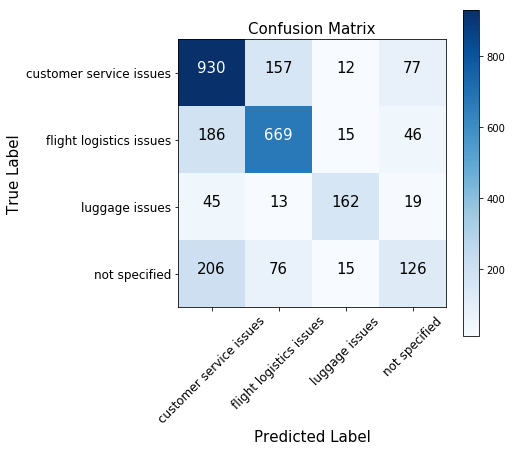

In [93]:
# Plot confusion matrix
class_names_label_airline = ['customer service issues', 'flight logistics issues', 'luggage issues', 'not specified']
plt.figure(figsize=(6,6))
plt.imshow(cm_neg_reasons, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(class_names_label_airline))
plt.xticks(tick_marks, class_names_label_airline, rotation=45, fontsize=12)
plt.yticks(tick_marks, class_names_label_airline, fontsize=12)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)

for i in range(len(cm_neg_reasons)):
    for j in range(len(cm_neg_reasons[i])):
        color = 'black'   
        if cm_neg_reasons[i][j] > 500:
            color = 'white'
        plt.text(j, i, format(cm_neg_reasons[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

The results of the confusion matrix complement the results of the classification report quite well. The model was accurate in detecting customer service issues, flight logistics issues and luggage related issues. However, it was not accurate in detecting the not specified issue. Instead, it would occasionally classify the not specified issue as another negative reason. Likewise, between the other negative reasons, the model was occasionally mistaken in classifying tweets as a customer service related issue. This can be attributed to the similarities between the negative reasons with the generic reason of customer service. Additionally, features that distinguish between customer service and other issues like luggage and flight related could contain similar words and hence, makes the model difficult to determine the correct reason to classify the tweet.  This will be covered in greater detail in the discussion section in section 5.0. 

A ROC curve was generated to plot TPR and FPR rates at different classification thresholds. Since the ROC metrics are not well-defined in the multi-class case, we will use a OneVsRestClassifier to set one class as true and rest as false for each respective class

In [94]:
# binarize negative reason bins for the OneVsRestClassifier
bin_y = label_binarize(y_neg_US_airline, classes=cat_neg_reasons)

X_train, X_test, y_train, y_test = train_test_split(X_neg_US_airline, bin_y, test_size=0.3, random_state=101)

model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [95]:
# We will retrieve the prediction probabilities for each class as well as the FPR, TPR and AUC of each class
y_score = model.decision_function(X_test)

In [96]:
# compute True positive rate (TPR), false positive rate (FPR), and area under curve (auc) for each class
TPR, FPR, AUC = {}, {}, {}

for i in range(len(cat_neg_reasons)):
    FPR[i], TPR[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    AUC[i] = auc(FPR[i], TPR[i])

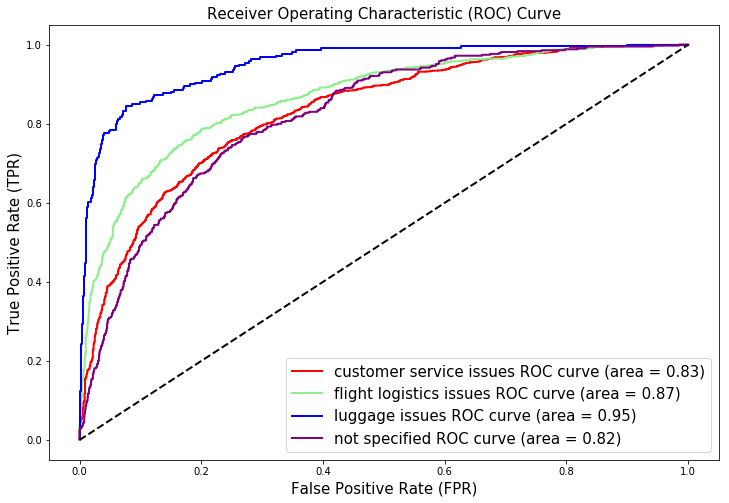

In [97]:
plt.figure(figsize=(12,8))
colors = ['red','lightgreen','blue', 'purple']
for i in range(len(cat_neg_reasons)):
    plt.plot(FPR[i], TPR[i], color=colors[i], lw=2, label='%s ROC curve (area = %0.2f)' % (cat_neg_reasons[i],AUC[i]))

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)', fontsize=15)
plt.ylabel('True Positive Rate (TPR)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
plt.legend(loc=4, fontsize=15)
plt.show()

The model trained using logistic regression for multi-class classification achieved an accuracy of 68.52% using the test data in estimating the reasons behind the poor negative sentiment of the tweet. This score is considered to be slightly lower than desired. However, this decrease in performance is expected for logistic regression applied to multiple class classification. Specifically, the model faced difficulties in classifying the 'not specified issue' and mistakenly classified multiple tweets as a customer related issue. Nevertheless, the ROC curve generated as a OneVsRestClassifier model achieved high scores as the graph tended to lean towards to the upper left corner. This result is notable for the luggage related and flight related issues as the model made the least mistakes in these categories. Moreover, a similar result from the confusion matrix is seen in the shape and area under the ROC curve for the customer service issue and the not specified issues. It's area is noticeably lower due to the model's occasional errors as classifying these two categories with another reason. Hence, we can see that the decision threshold for the customer service and not specified issue isn't well defined or accurate enough to differentiate these classes with the other reasons. 

### 4.3.1. BONUS: Hyperparameter Tuning (C Parameter in Multi-class Classification Problem)

In this section, we will investigate the effect of the C parameter in the prediction accuracy of the multi-class classification problem similar to the previous bonus section. 

In [98]:
# C parameter tuning applied to generic tweets
C_tuning = np.arange(0.1, 1.1, 0.1)
C_neg_reason_accuracies = []

for C_test in C_tuning:
    model_C_tuning_neg_reason = LogisticRegression(C=C_test)
    model_C_tuning_neg_reason.fit(X_neg_CV_train, y_neg_CV_train)
    
    predictions_C_neg_reason = model_C_tuning_neg_reason.predict(X_neg_CV_test)
    C_neg_reason_accuracies.append(accuracy_score(y_neg_CV_test, predictions_C_neg_reason)*100)
    
    print('C Parameter: %.1f, Classification Accuracy: %.2f%%' % (C_test, (accuracy_score(y_neg_CV_test, predictions_C_neg_reason)*100)))

C Parameter: 0.1, Classification Accuracy: 67.68%
C Parameter: 0.2, Classification Accuracy: 68.19%
C Parameter: 0.3, Classification Accuracy: 68.19%
C Parameter: 0.4, Classification Accuracy: 68.48%
C Parameter: 0.5, Classification Accuracy: 68.26%
C Parameter: 0.6, Classification Accuracy: 68.52%
C Parameter: 0.7, Classification Accuracy: 68.48%
C Parameter: 0.8, Classification Accuracy: 68.48%
C Parameter: 0.9, Classification Accuracy: 68.48%
C Parameter: 1.0, Classification Accuracy: 68.52%


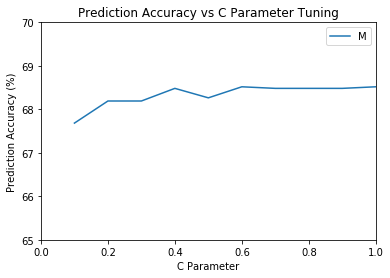

In [99]:
# Plot Multi-class Classification Accuracies vs C Parameter

plt.plot(C_tuning, C_neg_reason_accuracies)
plt.axis([0, 1.0, 65, 70])
plt.gca().legend(('Multi-class Classification'))
plt.title('Prediction Accuracy vs C Parameter Tuning')
plt.xlabel('C Parameter')
plt.ylabel('Prediction Accuracy (%)')
plt.show()

Similar to the C parameter tuning for the sentiment analysis logistic regression model, the prediction accuracies reach a steady value as the C parameter increases. Higher C values typically result in overfitted models. Nevertheless, the prediction accuracy of the C parameter of 0.6 has almost the same accuracy as that with a C value of 1.0. Hence, the model can achieve relatively high accuracies approximately about 68.5%. It is important to note that the prediction accuracies do not change significantly over this parameter but has increased by a small margin. Higher C values may increase computation complexity and based on the incremental addition in accuracy, it may not be necessary and ideal in this application in the multi-class classification problem. 

## 5.0 Analysis and Discussion of Results

In this section, we will first discuss the results of the sentiment classification model using logistic regression to answer the research question posed at the beginning of the code. The first segment will also indicate how each airline is viewed in the public eye based on the results of the sentiment value. The second segment will discuss the performance of the multi-class logistic regression model with justification on why it performed worse than the first model. Lastly, suggestions to improve both models are listed near the end of this section. 

### 5.1 Analysis and Interpretation of Results for the Sentiment Analysis of US Airline Tweets

The logistic regression model was quite accurate in predicting the sentiment of the generic tweets (accuracy of 78.76%). This model was then applied to the US airlines tweets and achieved an accuracy of 78.18%. 

Using the outputs of the developed model, the research question of this project will be answered: 

#### "What can public opinion on Twitter tell us about US airlines in 2015?"

From the data cleaning process, we saw that most tweets in the US airline dataset contained mostly negative sentiment. We will first look into the predicted sentiment and compare it to the actual sentiment available in the data set with respect to each US airline. 

In [100]:
# Group by airlines and predicted sentiment
df_pred = US_airlines_tweets.groupby(['Airline', 'Predicted Sentiment']).count()
negative_list_airline_pred = []
negative_list_count_pred = []
positive_list_airline_pred = []
positive_list_count_pred = []
for index, row in df_pred.iterrows():
    # index[0] is the airline
    # index[1] is the sentiment category
    # row.id is the count
    if index[1] == 0:
        negative_list_airline_pred.append(index[0])
        negative_list_count_pred.append(row.id)
    else:
        positive_list_airline_pred.append(index[0])
        positive_list_count_pred.append(row.id)


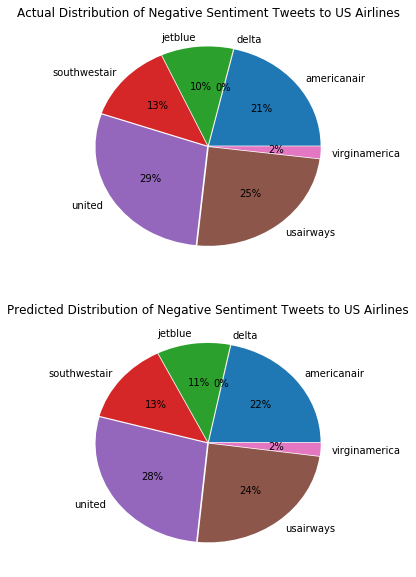

In [101]:
# Compare negative tweets between actual data and model predicted among US airlines
# Pie chart for actual negative tweets 
fig = plt.figure(figsize=(5,10))
fig.add_subplot(2,1,1)
labels = negative_list_airline
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
plt.pie(negative_list_count, explode=explode, labels=labels, autopct='%1.0f%%',shadow=False)
plt.title('Actual Distribution of Negative Sentiment Tweets to US Airlines')

# Pie chart for negative tweets airlines
fig.add_subplot(2,1,2)
plt.pie(negative_list_count_pred, explode=explode, labels=labels, autopct='%1.0f%%',shadow=False)
plt.title('Predicted Distribution of Negative Sentiment Tweets to US Airlines')
plt.show()

Based on a comparison of the distribution of the negative sentiment tweets, the model was quite accurate in determining the negative sentiment tweets of the US airlines. Most of the negative airlines were associated with United and US airways. The difference between the predicted and actual sentiment was very small - the model underestimated the negative sentiment towards United and US airways but the distribution of tweets classified in terms of sentiment was quite accurate. 

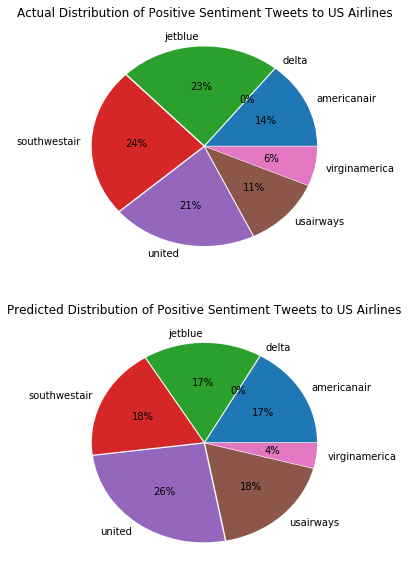

In [102]:
# Compare positive tweets between actual data and model predicted among US airlines
# Pie chart for actual positive tweets 
fig = plt.figure(figsize=(5,10))
fig.add_subplot(2,1,1)
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
labels = positive_list_airline
plt.pie(positive_list_count, explode = explode,labels=labels, autopct='%1.0f%%',shadow=False)
plt.title('Actual Distribution of Positive Sentiment Tweets to US Airlines')

# Pie chart for predicted positive tweets airlines
fig.add_subplot(2,1,2)
labels = positive_list_airline
plt.pie(positive_list_count_pred, explode=explode, labels=labels, autopct='%1.0f%%',shadow=False)
plt.title('Predicted Distribution of Positive Sentiment Tweets to US Airlines')
plt.show()

Based on a comparison of the distribution of the positive sentiment tweets, the model was not as accurate in determining the positive sentiment tweets compared to the negative sentiment tweets of the US airlines. For example, the model slightly underestimated the positive sentiment of the tweets associated to jetblue, and southwest air. 

In the following graphs, we will look into the distribution of tweets associated to each airline with respect to its sentiment value. 

In [103]:
# Pie chart splitting each airlines and finding the percentage of pos and neg based on the provided data set

# airline = [number of tweets neg, number of tweets pos]
AmericanAir_act = [df_act.loc[('americanair', 0),]['id'], df_act.loc[('americanair', 1),]['id']]
Delta_act = [df_act.loc[('delta', 0),]['id'], 0] # based on the previous result, there were no identified positive tweets for delta
Jetblue_act = [df_act.loc[('jetblue', 0),]['id'], df_act.loc[('jetblue', 1),]['id']]
Southwest_act = [df_act.loc[('southwestair', 0),]['id'], df_act.loc[('southwestair', 1),]['id']]
United_act = [df_act.loc[('united', 0),]['id'], df_act.loc[('united', 1),]['id']]
USAirway_act = [df_act.loc[('usairways', 0),]['id'], df_act.loc[('usairways', 1),]['id']]
Virgin_act = [df_act.loc[('virginamerica', 0),]['id'], df_act.loc[('virginamerica', 1),]['id']]


In [104]:
# Pie chart splitting each airlines and finding the percentage of pos and neg based on the predicted data set

AmericanAir_pred = [df_pred.loc[('americanair', 0),]['id'], df_pred.loc[('americanair', 1),]['id']]
Delta_pred = [df_pred.loc[('delta', 0),]['id'], df_pred.loc[('delta', 1),]['id']]
Jetblue_pred = [df_pred.loc[('jetblue', 0),]['id'], df_pred.loc[('jetblue', 1),]['id']]
Southwest_pred = [df_pred.loc[('southwestair', 0),]['id'], df_pred.loc[('southwestair', 1),]['id']]
United_pred = [df_pred.loc[('united', 0),]['id'], df_pred.loc[('united', 1),]['id']]
USAirway_pred = [df_pred.loc[('usairways', 0),]['id'], df_pred.loc[('usairways', 1),]['id']]
Virgin_pred = [df_pred.loc[('virginamerica', 0),]['id'], df_pred.loc[('virginamerica', 1),]['id']]

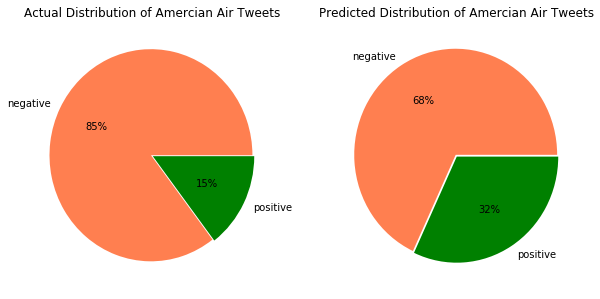

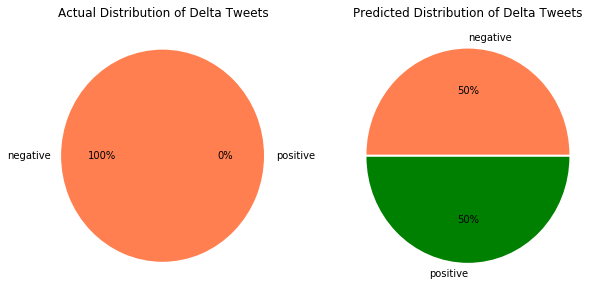

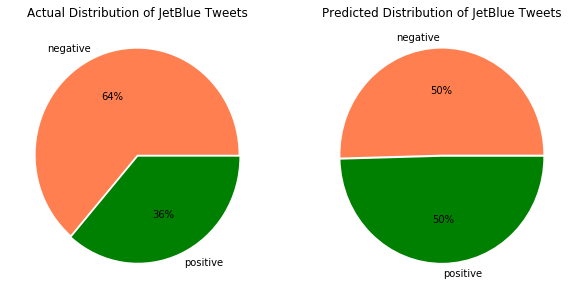

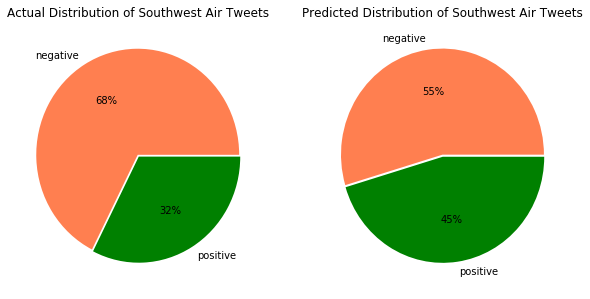

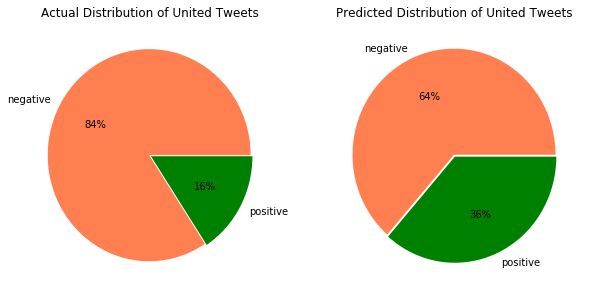

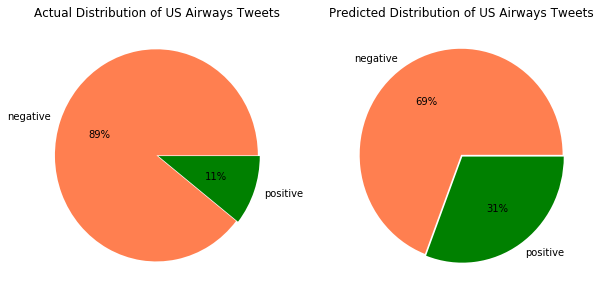

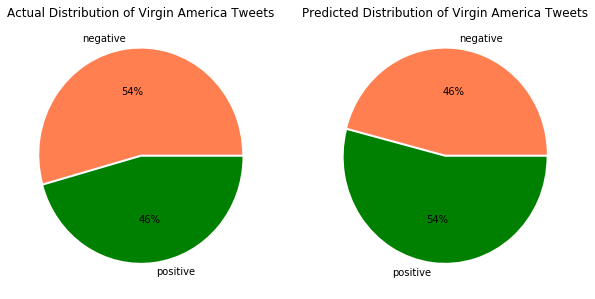

In [105]:
# Compare positive tweets between actual data and model predicted among US airlines

# Pie chart for actual American Air Distribution
fig = plt.figure(figsize=(10,40))
fig.add_subplot(7,2,1)
explode = (0.01, 0.01)
labels = ['negative','positive']
colors = ['coral', 'green']
plt.pie(AmericanAir_act, explode=explode,labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Actual Distribution of Amercian Air Tweets')

# Pie chart for predicted American Air Distribution
fig.add_subplot(7,2,2)
plt.pie(AmericanAir_pred, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Predicted Distribution of Amercian Air Tweets')
plt.show()

# Pie chart for actual Delta Distribution
fig = plt.figure(figsize=(10,40))
fig.add_subplot(7,2,3)
labels = ['negative','positive']
plt.pie(Delta_act, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Actual Distribution of Delta Tweets')

# Pie chart for predicted Delta Distribution
fig.add_subplot(7,2,4)
plt.pie(Delta_pred, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Predicted Distribution of Delta Tweets')
plt.show()

# Pie chart for actual JetBlue Distribution
fig = plt.figure(figsize=(10,40))
fig.add_subplot(7,2,5)
labels = ['negative','positive']
plt.pie(Jetblue_act, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Actual Distribution of JetBlue Tweets')

# Pie chart for predicted JetBlue Distribution
fig.add_subplot(7,2,6)
plt.pie(Jetblue_pred, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Predicted Distribution of JetBlue Tweets')
plt.show()

# Pie chart for actual Southwest Air Distribution
fig = plt.figure(figsize=(10,40))
fig.add_subplot(7,2,7)
labels = ['negative','positive']
plt.pie(Southwest_act, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Actual Distribution of Southwest Air Tweets')

# Pie chart for predicted Southwest Air Distribution
fig.add_subplot(7,2,8)
plt.pie(Southwest_pred, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Predicted Distribution of Southwest Air Tweets')
plt.show()

# Pie chart for actual United Distribution
fig = plt.figure(figsize=(10,40))
fig.add_subplot(7,2,9)
labels = ['negative','positive']
plt.pie(United_act, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Actual Distribution of United Tweets')

# Pie chart for predicted United Distribution
fig.add_subplot(7,2,10)
plt.pie(United_pred, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Predicted Distribution of United Tweets')
plt.show()

# Pie chart for actual US Airways Distribution
fig = plt.figure(figsize=(10,40))
fig.add_subplot(7,2,11)
labels = ['negative','positive']
plt.pie(USAirway_act, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Actual Distribution of US Airways Tweets')

# Pie chart for predicted US Airways Distribution
fig.add_subplot(7,2,12)
plt.pie(USAirway_pred, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Predicted Distribution of US Airways Tweets')
plt.show()

# Pie chart for actual Virgin America Distribution
fig = plt.figure(figsize=(10,40))
fig.add_subplot(7,2,13)
labels = ['negative','positive']
plt.pie(Virgin_act, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Actual Distribution of Virgin America Tweets')

# Pie chart for predicted Virgin America Distribution
fig.add_subplot(7,2,14)
plt.pie(Virgin_pred, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',shadow=False)
plt.title('Predicted Distribution of Virgin America Tweets')
plt.show()

In general, most people tweeted mostly negative things about the US airlines in 2015 based on the predicted sentiment of the model. The sentiment towards the following airlines were classified by the model to have more than half the tweets bearing negative sentiment: 
-	American Air
-	Southwest Air
-	United
-	USAirways

The remaining airlines such as Delta, JetBlue, and Virgin America were classified to have almost an even split of positive and negative sentiment tweets. 

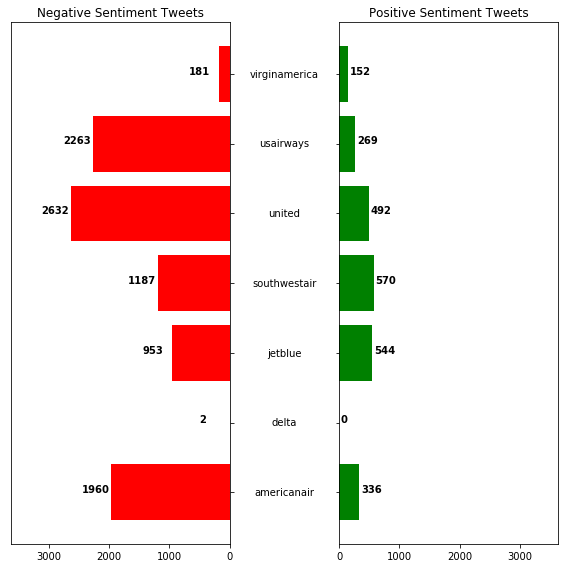

In [106]:
# Plot previous figure to compare positive and negative tweets for each airline
fig_compare

In comparison to the actual distribution for each airline, the model underestimates the classification of negative tweets, as previously seen in the classification report and confusion matrix. Nevertheless, as shown in the above graph (retrieved from the data cleaning section of this python notebook), most people tweeted about their poor experience with United, US Airways and American Air the most. 

#### Brief Answer to Research Question: 

Overall, public opinion was mostly negative towards the US airlines in 2015. A model was trained to distinguish positive or negative sentiment using a generic tweets data set. This model was then applied to the US airline tweets data set to determine its sentiment value. The model was able to achieve accurate results, with an accuracy score of 78.18%. It was also noted that the model underestimated the negative sentiment tweets in the data set compared to its actual value. The model occasionally incorrectly classifies tweets as positive where in fact, they were negative. This inaccuracies can be attributed to the corpus used as the features to the model. The model was trained initially on the generic tweets data set and this data set may contain different words (feautures) that are more prominent in the generic tweets dataset than the US airline dataset. Hence, select words that may bear positive or negative sentiment in the US airline tweets may not be fully utilized in the model used. If the model was trained one the US airlines tweets, the accuracy of the model may slightly increase. Furthermore, features in both negative and positive sentiment have a small extent of overlapping words with each other as shown in the word clouds in Section 2.0. Hence, the decision threshold of the model may have difficulty determining its sentiment based on the currently selected features. Nevertheless, the conclusion and trend from the output of the model and the actual sentiment values in the data set were the same. Most people were not satisfied with their experience with United, USAirways, and SouthWest Air the most compared to other airlines. Common reasons for the negative sentiment tweets will be discussed in the following section under the multi-class classification section. 

In descending order, the worst airline according to the number of negative tweets were: 
1. United - viewed more negative than any other airline
2. USAirways - viewed second most negative
3. AmericanAir - third worst airline
4. SouthWest Air - fourth worst airline despite having some positive tweets
5. JetBlue - almost even split between positive and negative tweets
6. Virgin America - almost even split between positive and negative tweets
7. Delta - not enough information to draw conclusion but among the data, it was negative. 

### 5.2 Analysis and Interpretation of Results for the Multi-class Classification Model of US Airline Tweets

In this section, we will provide a few reasons as to why the model performed poorly to predict the correct negative reasons. We will also briefly discuss methods to improve the accuracy of the model. 

We will first compare the actual and predicted negative reasons:

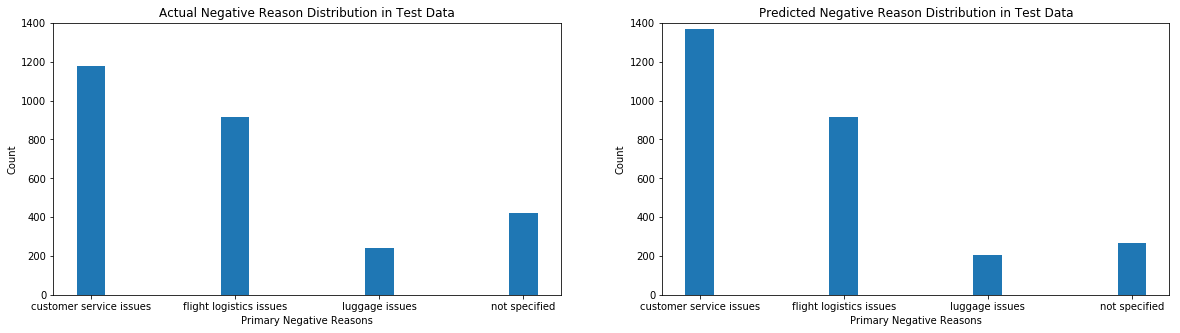

In [107]:
# Compare predicted and actual bins for the test case
customer_bin_act = 0
customer_bin_pred = 0
flight_bin_act = 0
flight_bin_pred = 0
luggage_bin_act = 0
luggage_bin_pred = 0
na_bin_act = 0
na_bin_pred = 0

for element in y_neg_CV_test:
    if element == 'customer service issues':
        customer_bin_act += 1
    elif element == 'flight logistics issues':
        flight_bin_act += 1
    elif element == 'luggage issues':
        luggage_bin_act += 1
    else:
        na_bin_act += 1
    
for element in predictions_neg_US_airline:
    if element == 'customer service issues':
        customer_bin_pred += 1
    elif element == 'flight logistics issues':
        flight_bin_pred += 1
    elif element == 'luggage issues':
        luggage_bin_pred += 1
    else:
        na_bin_pred += 1
#predictions_neg_US_airline

bin_act = [customer_bin_act, flight_bin_act, luggage_bin_act, na_bin_act]
bin_pred = [customer_bin_pred, flight_bin_pred, luggage_bin_pred, na_bin_pred]
cat_neg_reasons = ['customer service issues', 'flight logistics issues', 'luggage issues', 'not specified']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(cat_neg_reasons,bin_act, width=0.2, align='center')
plt.xlabel('Primary Negative Reasons')
plt.title('Actual Negative Reason Distribution in Test Data')
plt.ylabel('Count')
plt.ylim(0, 1400)

plt.subplot(1,2,2)
plt.bar(cat_neg_reasons,bin_pred, width=0.2, align='center')
plt.xlabel('Primary Negative Reasons')
plt.title('Predicted Negative Reason Distribution in Test Data')
plt.ylim(0, 1400)
plt.ylabel('Count')
plt.show()

Similar to the results of the classification and confusion matrix, the model was prone to error particularly classifying 'customer service issues' and the 'not specified issues'. One potential cause of error could be drawn back to the training dataset used. The model's performance can be attributed back to the data used to train it. For instance, if the model's training data set did not contain sufficient samples of the 'not specified' tweets, then it may also lead the model to perform poorly when classifying 'not specified' tweets since it did not have enough tweets of this category to learn from. Hence, the model may be skewed towards other categories that may have more samples in the training data set.  

The percentage of customer related issues in the training data set is: 43.51%
The percentage of flight logistics issues in the training data set is: 33.08%
The percentage of luggage related issues in the training data set is: 8.70%
The percentage of not specified issues in the training data set is: 14.71%


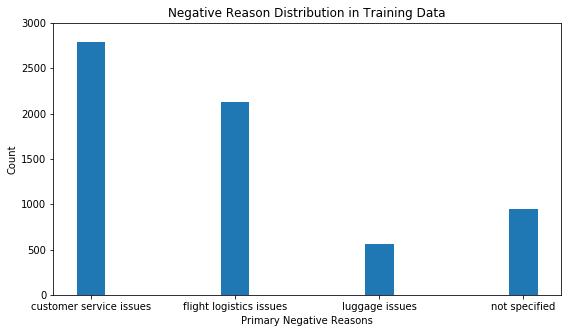

In [108]:
# Distribution of Training Data Set
customer_bin_train = 0
flight_bin_train = 0
luggage_bin_train = 0
na_bin_train = 0

# Count how many tweets were in each category
for element in y_neg_CV_train:
    if element == 'customer service issues':
        customer_bin_train += 1
    elif element == 'flight logistics issues':
        flight_bin_train += 1
    elif element == 'luggage issues':
        luggage_bin_train += 1
    else:
        na_bin_train += 1

bin_train = [customer_bin_train, flight_bin_train, luggage_bin_train, na_bin_train]
total_bin_train = sum(bin_train)
perc_train = []
for quantity in bin_train:
    percentage = 100 * quantity/total_bin_train
    perc_train.append(percentage)

print("The percentage of customer related issues in the training data set is: %.2f%%" %perc_train[0])
print("The percentage of flight logistics issues in the training data set is: %.2f%%" %perc_train[1])
print("The percentage of luggage related issues in the training data set is: %.2f%%" %perc_train[2])
print("The percentage of not specified issues in the training data set is: %.2f%%" %perc_train[3])

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(cat_neg_reasons,bin_train, width=0.2, align='center')
plt.xlabel('Primary Negative Reasons')
plt.title('Negative Reason Distribution in Training Data')
plt.ylabel('Count')
plt.ylim(0, 3000)
plt.show()

Based on the training data set, most of the tweets that were used to train the model were mostly caused by customer related issues, followed by flight logistics issues. Hence, there might be a tendency for the model to classify some tweets as customer related issue more frequently than the rest due to the the training data set being skewed. However, this also depends on the features used to distinguish each classification. We will now look into the specific words chosen to distinguish these categories/reasons using the wordcloud for tweets that were classified for each reason. 

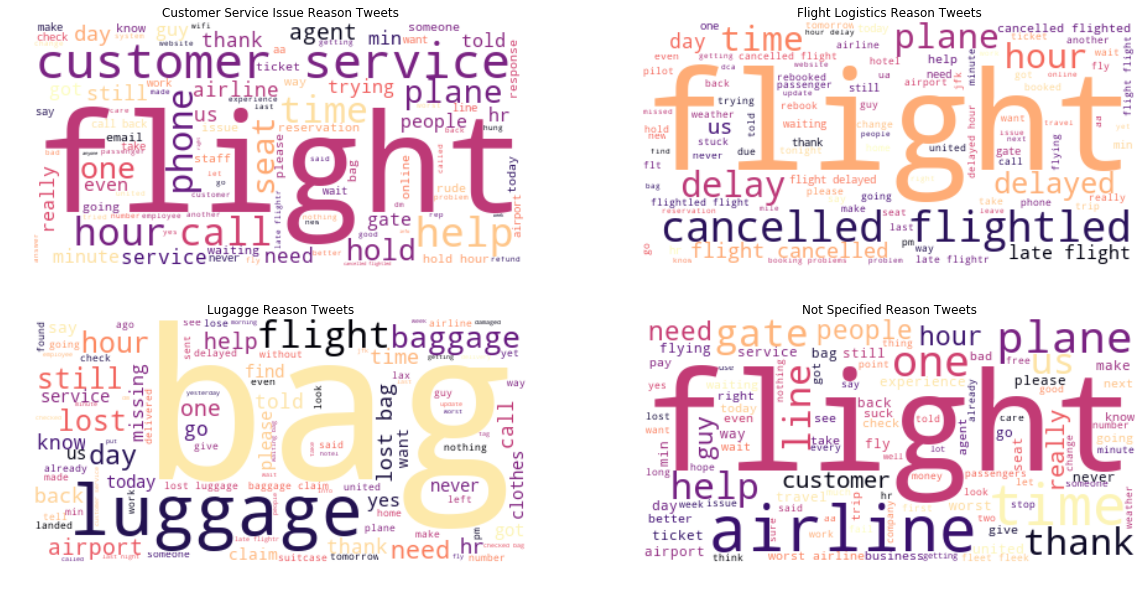

In [109]:
# Plot word cloud for each respective bin to see common overlapping words

# Customer service
customer_service_tweets = negative_airline_df[negative_airline_df['Reason Bin']=='customer service issues']
customer_service_text = customer_service_tweets['Cleaned Text']
wordcloud_customer_service_airline_tweets = getWordCloud(customer_service_text, 100, 250,'magma')
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(wordcloud_customer_service_airline_tweets, interpolation="bilinear")
plt.axis("off")
plt.title('Customer Service Issue Reason Tweets')

# Flight Logistics
flight_logistic_tweets = negative_airline_df[negative_airline_df['Reason Bin']=='flight logistics issues']
flight_logistic_texts = flight_logistic_tweets['Cleaned Text']
wordcloud_flight_logistics_airline_tweets = getWordCloud(flight_logistic_texts, 100, 250,'magma')
plt.subplot(2,2,2)
plt.imshow(wordcloud_flight_logistics_airline_tweets, interpolation="bilinear")
plt.axis("off")
plt.title('Flight Logistics Reason Tweets')

# Luggage
luggage_tweets = negative_airline_df[negative_airline_df['Reason Bin']=='luggage issues']
luggage_texts = luggage_tweets['Cleaned Text']
wordcloud_luggage_airline_tweets = getWordCloud(luggage_texts, 100, 250,'magma')
plt.subplot(2,2,3)
plt.title('Lugagge Reason Tweets')
plt.imshow(wordcloud_luggage_airline_tweets, interpolation="bilinear")
plt.axis("off")

# Not specified
na_tweets = negative_airline_df[negative_airline_df['Reason Bin']=='not specified']
na_texts = na_tweets['Cleaned Text']
wordcloud_na_tweets = getWordCloud(na_texts, 100, 250,'magma')
plt.subplot(2,2,4)
plt.title('Not Specified Reason Tweets')
plt.imshow(wordcloud_na_tweets, interpolation="bilinear")
plt.axis("off")
plt.show()

Based on the wordcloud for each reason, it is clear that some categories have distinct words to differentiate them from the others while there also words that overlap between all the listed reasons. For example, a notable word to distinguish the luggage related issue is the word 'bag' or 'luggage'. Hence, if the tweet contained this or a similar word, the model would easily classify it as a luggage related issue. The performance of the model was also relatively good for classifying the luggage related issue. Moreover, 'cancelled flight' would also signify a flight logistic issue. However, words such as "flight" and "airline" were quite common in multiple negative reasons. Hence, tweets that contained these or similar words would tend to have difficulty in classifying it to the correct category. In particular, this behaviour is seen in the results of the confusion matrix of the model as it mistakenly classifies certain tweets to be customer service related where in fact it was a flight logistic related issue. Similarly, the word clouds (and inherently features) of both customer service and the not specified reason tweets are very similar which can be the reason behind why the model performed poorly when distinguishing between the two classes as seen on the confusion matrix and the ROC curve in section 4.3. 

To explore this issue further, we will pull up an example of a tweet that originally classified as a customer service issue and the model classified it as another reason. 

In [110]:
# Apply model to all sets and then store the predicted bin as a new column to negative_airline_df
# This will allow us to easily find and sort through the actual and predicted negative reasons in the dataframe

predictions_neg_US_airline_store = model_neg_US_airlines_CV.predict(X_neg_US_airline)
negative_airline_df['Predicted Reason Bin'] = pd.Series(predictions_neg_US_airline_store)

In [111]:
negative_airline_df[(negative_airline_df['Reason Bin'] == 'customer service issues') & (negative_airline_df['Predicted Reason Bin'] != 'customer service issues')]

,index,id,sentiment,negative_reason,user,retweet_count,text,Mentions,Hashtags,Cleaned Text,Airline,Predicted Sentiment,Reason Bin,Predicted Reason Bin
9,22,5.702080e+17,0,Bad Flight,blackjackpro911,0,@VirginAmerica amazing to me that we can't get...,[virginamerica],"[vx358, noair, worstflightever, roasted, sfoto...",amazing not get cold air vents vx noair worstf...,virginamerica,0,customer service issues,not specified
101,171,5.691930e+17,0,Customer Service Issue,bluesmoon,0,@VirginAmerica the CSS on your site is a 404 r...,[virginamerica],[],css site right please fix site unusable,virginamerica,0,customer service issues,flight logistics issues
174,320,5.677850e+17,0,Customer Service Issue,RyScanlon,0,@VirginAmerica Grouping Virgin in with the oth...,[virginamerica],[],grouping virgin others bos weather exposed act...,virginamerica,0,customer service issues,flight logistics issues
180,330,5.677440e+17,0,Customer Service Issue,texasjuls,0,@VirginAmerica my group got their Cancelled Fl...,[virginamerica],[],group got cancelled flightlation fees waived n...,virginamerica,0,customer service issues,flight logistics issues
218,380,5.702730e+17,0,Customer Service Issue,johnkarpf,0,@united No. Denver said they don't handle bagg...,[united],[],denver said not handle baggage made colo sprin...,united,0,customer service issues,luggage issues
242,408,5.702570e+17,0,Flight Attendant Complaints,CassiusCCIDog,1,@united what's the point of asking for details...,[united],[servicedog],point asking details servicedog book flight cr...,united,1,customer service issues,flight logistics issues
244,410,5.702530e+17,0,Bad Flight,PFlandersdc,0,@united #worst2unitedflightsever UA 236 LAS to...,[united],"[worst2unitedflightsever, wtfodds]",worst unitedflightsever ua las iad mechanical ...,united,0,customer service issues,flight logistics issues
276,444,5.702280e+17,0,Customer Service Issue,missinver,0,@united Could this email be resent as it doesn...,[united],[],could email resent doesnt appear arrived,united,1,customer service issues,not specified
290,460,5.702050e+17,0,Flight Attendant Complaints,Evan_Flay,0,@united are the ones who make it difficult for...,[united],[],ones make difficult,united,0,customer service issues,not specified
316,492,5.701600e+17,0,Customer Service Issue,FreedomFilmNJ,0,@united terminal at MIA should have food open ...,[united],[],terminal mia food open esp flights two hours e...,united,0,customer service issues,flight logistics issues


In [112]:
tweet_sample = negative_airline_df.iloc[406]['text']
tweet_sample

"@united computers are down but you stopped giving updates and took my flight info off the app. That's just ridiculous keep people updated!"

In [113]:
tweet_cleaned_sample = negative_airline_df.iloc[406]['Cleaned Text']
tweet_cleaned_sample

'computers stopped giving updates took flight info app ridiculous keep people updated'

From the tweet above, it is difficult to categorize these tweet to the known list of reasons as mentioned earlier. By looking at the features and the results of the word clouds, we can easily see that this tweet contained the word 'flight', which pertains to multiple negative reasons. Furthermore, this tweet is very hard to classify between the categories as this tweet may pertain to the flight logistics issue as the person lost information about his or her flight, but can also be classified as a customer service related issue since the airline is not providing any support or communication regarding the person's flight. It is also important to note that this is a recurring theme among the entire US airline tweets as some reasons could be attributed to multiple categories. Based from this tweet and a sample of the rest shown in the above dataframe, it is hard to classify certain tweets based solely on its word and context to a particular reason if it could be applicable to both categories, such as the case in the above tweet. 

Logistic regression can be used to classify binary classifications. However, it tends to underperform for multiclass classification especially if the decision boundaries between the cateogries (which are dependent on the features) are not strictly defined. Logistic regression performs well as a binary classification model as one can easily determine the decision threshold. This become increasingly difficult with the addition of multiple classes, and different threshold areas. 

#### 5.2.1 Suggestions to improve model accuracy: 

One method to improve the accuracy of both models is to tune the hyperparameters. This suggestion may lead to slightly higher performance but is also dependent on the features used in the model. Additionally, another method would also be to engineer better features to be used in the model. One example could be the use of a normalized word frequency for each sentence (TFID Vectorizer). This would normalized the word count with respect to the total amount of words in a given sentence instead of relying on the number of occurences of each word. Aside from these, one can also opt for another classification model such as the use of a decision tree classification model (for the multi-class classification model) as some categories are similar with subtle differences with one another. The decision tree will allow for a multi-class hierarchy that will aid in determining issues that are similar such as customer service related issues and the flight logistics issue as shown in the sample tweet. Neural networks can also be used for multiclass classification using Keras. However, with the work done in this project, the use of a decision tree classification model seems the best fit as most negative reasons are similar to one another with specific and minute differences. The decision tree will contain all the different classes as leaves on the tree. The features of the model will be used to determine the direction of branching within the tree. This technique will allow for checking individual features that are prominent within certain classes. Unlike logistic regression with a sigmoid function depicting close and vague thresholds between classes, the decision tree will be able to have distinct decision thresholds to differentiate multiple classes, thus achieving higher performance in the multi-class classification problem. 